<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 3: Métodos supervisados

En esta práctica veremos diferentes métodos supervisados y trataremos de optimizar diferentes métricas. Veremos como los diferentes modelos clasifican los puntos y con cuales obtenemos mayor precisión. Después aplicaremos todo lo que hemos aprendido hasta ahora a un dataset nuevo simulando un caso práctico real.

1. [Exploración de algoritmos supervisados](#eje1) \
    1.0. Carga de datos \
    1.1. Naive-Bayes\
    1.2. Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)\
    1.3. K vecinos más próximos (KNN)\
    1.4. Máquinas de soporte vectorial (SVM)\
    1.5. Árboles de decisión
2. [Implementación del caso práctico](#ej2)\
    2.0. Carga de datos\
    2.1. Análisis descriptivo\
    2.2. Entrenamiento, validación y prueba de una red neuronal con los datos originales\
    2.3. Submuestreo\
    2.4. Sobremuestreo\
    2.5. Generación de datos sintéticos\
    2.6. Sintonizando los modelos (BONUS)

<u>Consideraciones generales</u>: 

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Lukaz Martin Doehne
</div>

In [1]:
import numpy as np 
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='ej1'></a>
# 1. Exploración de algoritmos supervisados

## 1.0. Carga de datos

El conjunto de datos Spiral es un conjunto de datos sintéticos que se utiliza comúnmente en el aprendizaje automático y la minería de datos como un problema de clasificación no lineal. El conjunto de datos consta de dos espirales entrelazadas que se asemejan a las espirales de Arquímedes. Cada espiral se compone de un conjunto de puntos distribuidos uniformemente en el plano, y los puntos de cada espiral están etiquetados con una clase diferente.

El objetivo es utilizar un algoritmo de clasificación para predecir la clase de un punto desconocido en función de sus coordenadas (x, y). Debido a la naturaleza entrelazada de las espirales, este problema de clasificación es no lineal y, por lo tanto, es un desafío interesante para los algoritmos de aprendizaje automático.

El siguiente código cargará 2000 puntos en la variable `X` y la correspondientes etiqueta o grupo (en forma numérica) en la variable `y`. Podemos comprobar que la carga ha sido correcta obteniendo las dimensiones de estas dos variables y el gráfico de los puntos (con colores diferentes para cada grupo).

Dimensiones de X (2000, 2)
Dimensiones de y (2000,)


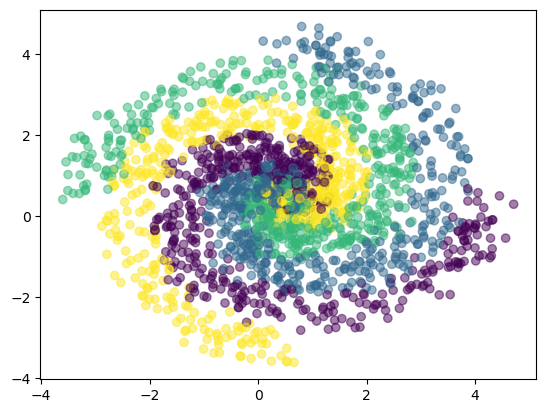

In [2]:
data = pd.read_pickle('spiral.pickle')

# Convertir las dos primeras columnas en un array de numpy
X = data[['X1', 'X2']].values

# Convertir la última columna en un array de numpy
y = data['y'].values

print('Dimensiones de X', X.shape)
print('Dimensiones de y', y.shape)

# Hacer la representación gráfica
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

A lo largo de los ejercicios aprenderemos a ver gráficamente las fronteras de decisión que nos devuelven los diferentes modelos. Para ello utilizaremos la función definida a continuación, que sigue los siguientes pasos:

   - Crear una [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) con los valores mínimo y máximo de 'x' e 'y'.
   - Predecir el clasificador con los valores de la _meshgrid_.
   - Hacer un _reshape_ de los datos para tener el formato correspondiente.
  
Una vez hecho esto, ya podemos hacer el gráfico de las fronteras de decisión y añadir los puntos reales. Así veremos las áreas que el modelo considera que son de una clase y las que considera que son de otra. Al poner encima los puntos veremos si los clasifica correctamente en el área que les corresponde.

In [5]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # Si X no es un array de numpy, lo convierte
        X = X.to_numpy()
    
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> 

Dividid el _dataset_ en dos subconjuntos, __*train*__ (80% de los datos) y __*test*__ (20% de los datos). Nombrad los conjuntos como: X_train, X_test, y_train, y_test. Utilizad la opción `random_state = 24`.
    
Podéis utilizar la implementación `train_test_split` de `sklearn`.
    
</div>

In [3]:
from sklearn.model_selection import train_test_split

# División en dos subconjuntos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [327]:
print(f"El dataset train tiene {X_train.shape[0]} datos y el test tiene {X_test.shape[0]} datos")

El dataset train tiene 1600 datos y el test tiene 400 datos


### 1.1. Gaussian Naïve Bayes

El objetivo de este primer ejercicio es entender el funcionamiento del algoritmo Naïve-Bayes, un algoritmo peculiar ya que se basa en el teorema de Bayes para calcular la probabilidad de que una observación pertenezca a cada una de las clases. El modelo asume que las características de entrada son independientes entre sí, lo que permite simplificar el cálculo de las probabilidades condicionales.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> 

- Con el dataset de _train_, entrenad un modelo de Naïve-Bayes. Podéis utilizar el clasificador `GaussianNB` de `sklearn`.

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.
    
Podéis utilizar la función `plot_decision_boundary` creada previamente, y las funciones `accuracy_score` y `confusion_matrix` del paquet `metrics` de `sklearn`.
</div>

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Creamos una función para su posterior uso
def train_classifier(clf, X_train, y_train, X_test, y_test):
    
    # Entreno/ajuste del clasificador
    clf.fit(X_train, y_train)
    
    # Guardamos las predicciones del test
    pred_test = clf.predict(X_test)
    
    # Calculamos el acurracy del modelo de las predicciones sobre las etiquetas
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, pred_test)

    # Calculamos la matriz de confusión sobre test
    confusion = confusion_matrix(y_test, pred_test)
    
    return clf, [accuracy_train, accuracy_test], confusion

In [6]:
from sklearn.naive_bayes import GaussianNB

# Creamos el clasificador Gaussian Naïve-Bayes
clf_nb = GaussianNB()

clf_nb, accuracy_nb, confusion_nb = train_classifier(clf_nb, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [15]:
print("title: "+"Accuracy en train: {:.2f}%".format(accuracy_nb1))

title:Accuracy en train: 29.44%


GaussianNB: GaussianNB: Accuracy en train: 29.44%
GaussianNB: Accuracy en test: 24.75%


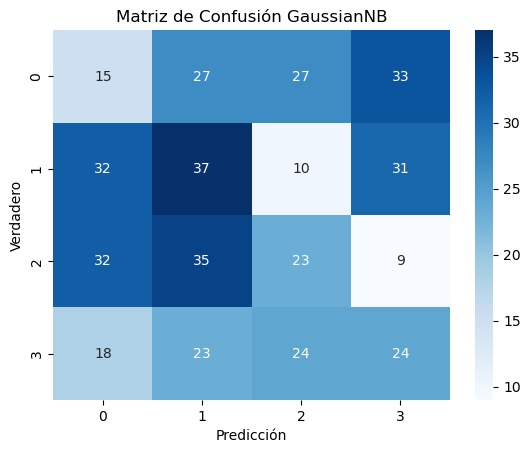

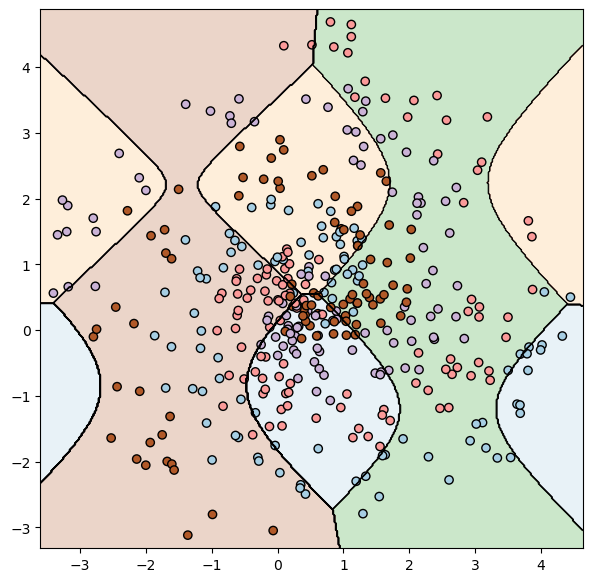

In [16]:
# Creamos una función para su posterior uso
def plot_matrix_acc(title, acc, matrix):
    # Resultado accuracy
    print(title +": GaussianNB: Accuracy en train: {:.2f}%".format(acc[0]*100))
    print("GaussianNB: Accuracy en test: {:.2f}%".format(acc[1]*100))

    # Matriz de confusión
    sns.heatmap(matrix, annot=True, cmap="Blues")
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusión {title}')
    plt.show()
plot_matrix_acc("GaussianNB",accuracy_nb, confusion_nb)
# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_nb, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
<b>Las fronteras de decisión son no lineales</b>, lo cual parece apropiado para este problema ya que se necesita un clasificador no lineal. Las fronteras se calculan utilizando el método de Naive Bayes Gaussiano, que predice la probabilidad de que un dato dentro de una zona pertenezca a una clase, lo que resulta en fronteras con curvas e irregularidades.<br><br>Sin embargo, el clasificador no resulta adecuado para este problema, ya que presenta una exactitud (<i>accuracy</i>) de 24.75% en el conjunto de test, lo que significa que hace predicciones aleatorias, ya que  disponemos de 4 clases.

</div>

### 1.2 Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)

Ahora analizaremos dos algoritmos que se basan en la transformación lineal de las características de entrada para maximizar la separación entre las clases. Estos modelos suponen que las características tienen una distribución gaussiana y así poder calcular las probabilidades condicionales de cada clase y asignar la clase con la mayor probabilidad como la clase predicha para una observación dada. 

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> 

- Con el dataset de _train_, entrenad un modelo de Análisis Discriminate Lineal (LDA). Podéis utilizar el clasificador `LinearDiscriminantAnalysis` de `sklearn`.

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.

</div>

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creamos el modelo LDA
clf_lda = LinearDiscriminantAnalysis()

clf_lda, accuracy_lda, confusion_lda = train_classifier(clf_lda, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

LDA: GaussianNB: Accuracy en train: 25.50%
GaussianNB: Accuracy en test: 24.75%


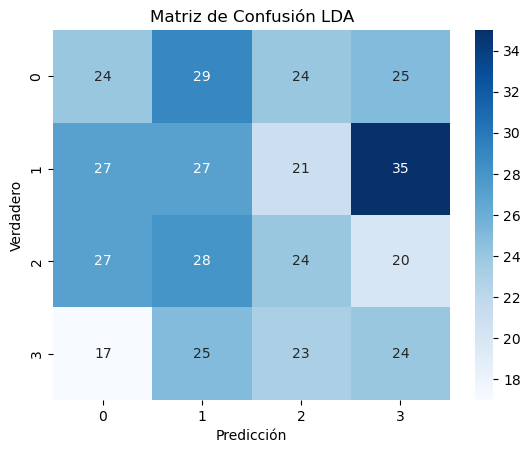

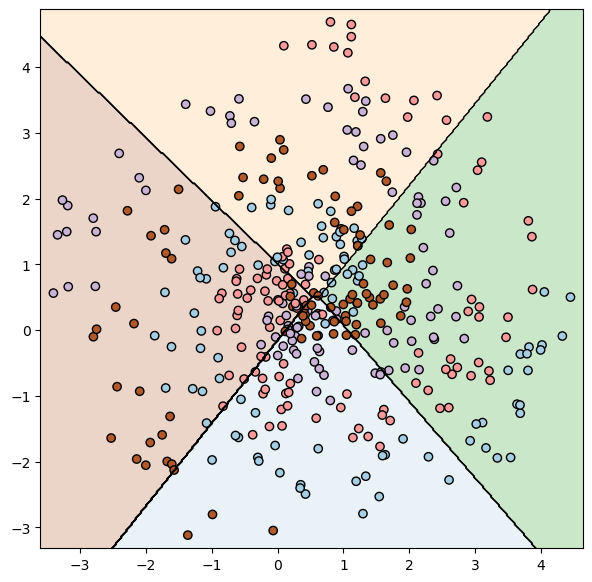

In [19]:
plot_matrix_acc("LDA",accuracy_lda, confusion_lda)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_lda, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>     <br><br>
En este caso, el modelo de Análisis Discriminante Lineal (LDA), asume que la relación entre las variables predictoras y la variable objetivo es lineal. Debido a esta limitación, <b>las fronteras de decisión obtenidas son lineales</b>, lo que no captura adecuadamente la estructura de los datos en forma de espiral.<br><br>
Además, la exactitud del modelo LDA sobre el conjunto de test es de 24.75%, lo que indica que no es capaz de hacer predicciones precisas y la predicción es aleatoria, ya que se disponen de 4 clases.

</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> 

- Con el dataset de _train_, entrenad un modelo de Análisis Discriminate Cuadrático (QDA). Podéis utilizar el clasificador `QuadraticDiscriminantAnalysis` de `sklearn`.

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.

</div>

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Creamos el modelo QDA
clf_qda = QuadraticDiscriminantAnalysis()

clf_qda, accuracy_qda, confusion_qda = train_classifier(clf_qda, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

QDA: GaussianNB: Accuracy en train: 26.38%
GaussianNB: Accuracy en test: 21.50%


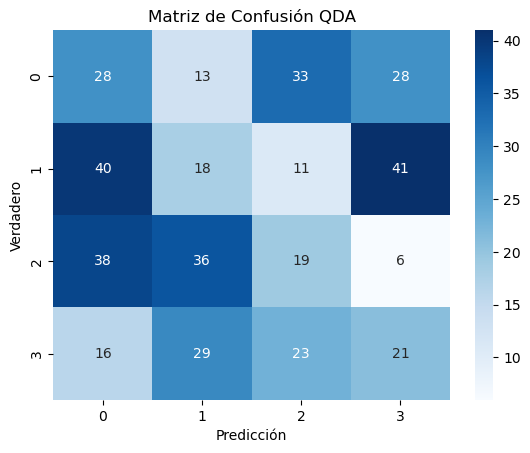

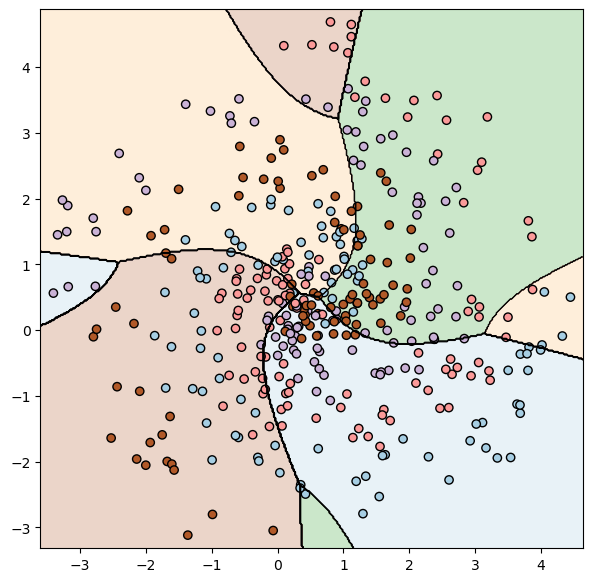

In [22]:
plot_matrix_acc("QDA",accuracy_qda, confusion_qda)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_qda, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> 

   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
   - ¿En que se diferencian el algoritmo LDA del QDA?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
<b>Las fronteras de decisión en el modelo QDA son no lineales</b> y presentan curvas e irregularidades. Esto tiene sentido con el algoritmo utilizado, ya que QDA es un clasificador con un límite de decisión cuadrático.<br><br>
Las predicciones obtenidas sobre el conjunto de test son similares a los modelos anteriores, obteniendo una exactitud(accuracy) de 21.50% sobre el conjunto de test y por tanto, también son predicciones aleatorias al tener 4 clases.<br><br>
En cuanto a las diferencias entre LDA y QDA, LDA asume una relación lineal entre las variables reales y las predicha, mientras que QDA asume una relación cuadrática. Además, LDA asume igualdad de covarianza entre las clases. Es por eso que en LDA observamos 4 líneas rectas que dividen los datos, mientras que en QDA observamos diversas fronteras no lineales. En ambos casos, la exactitud obtenida en el conjunto de test es baja.
</div>

### 1.3. K- vecinos más próximos KNN

En este punto entenderemos el funcionamiento del algoritmo KNN (que se basa en la proximidad de los puntos de datos en un espacio de características), intuir sus principales ventajas o desventajas y entender la influencia de los parámetros de los que está compuesto.

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado. 

Vamos a ver qué significa esto:

  - Supervisado: tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado.
  - Basado en instancia (_Lazy Learning_): Esto significa que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión), sino que memoriza las instancias de entrenamiento que son utilizadas como "conocimiento" para la fase de predicción.

¿Cómo funciona KNN?

  - Calculamos la distancia entre el ítem a clasificar y los demás ítems del dataset de entrenamiento.
  - Seleccionamos los "k" elementos más cercanos, es decir, con menor distancia, según la distancia que utilizamos (euclídea, coseno, manhattan, etc).
  - Por último realizamos una "votación de mayoría" entre los k puntos: los de la clase que "dominan" decidirán su clasificación final.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Con el dataset de _train_, entrenad un clasificador KNN con hiperparámetro `n_neighbors=2`. Podéis utilizar el clasificador `KNeighborsClassifier` de `sklearn`.

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.


Si al entrenar el clasificador sale un warning y lo quieres ignorar, ejecuta el siguiente código antes del entrenamiento:

`import warnings`\
`warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)`

</div>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo KNN
clf_knn = KNeighborsClassifier(n_neighbors=2)

clf_knn, accuracy_knn, confusion_knn = train_classifier(clf_knn, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [24]:
import warnings
warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)

KNN: GaussianNB: Accuracy en train: 88.31%
GaussianNB: Accuracy en test: 77.50%


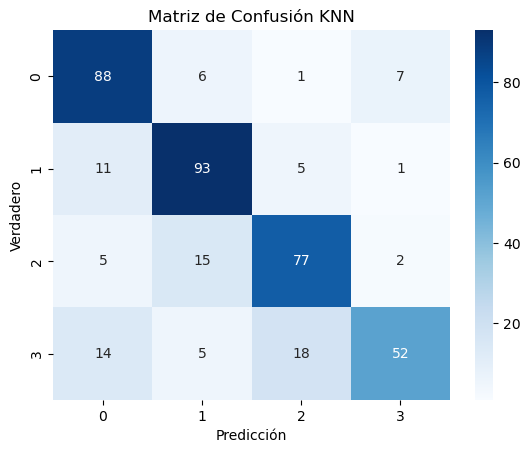

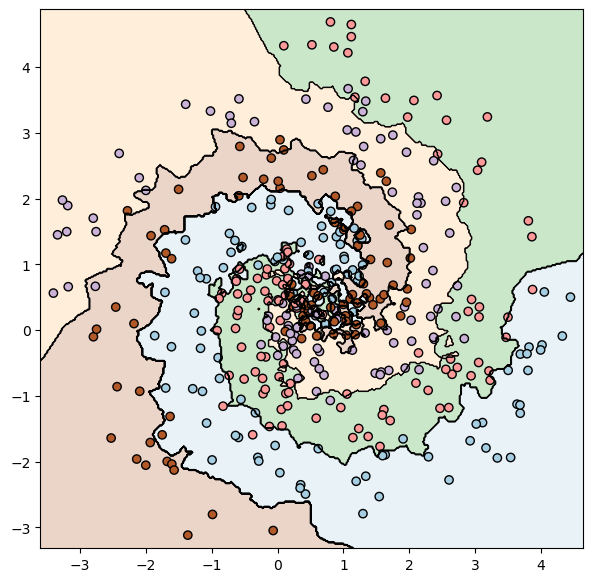

In [26]:
plot_matrix_acc("KNN",accuracy_knn, confusion_knn)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_knn, X_test, y_test)

En el modelo entrenado, hemos fijado el parámetro `n_neighbors` de forma arbitraria. Pero podría ser que con otro valor obtuviéramos una mejor predicción.

Para conocer el valor óptimo de los parámetros de un modelo (_hyperparameter tunning_) se suele utilizar una búsqueda de rejilla (_grid search_). Es decir, entrenar un modelo para cada combinación de hiperparámetros posible y evaluarlo utilizando validación cruzada (_cross validation_) con 5 particiones estratificadas. Posteriormente, se elige la combinación de hiperparàmetres que mejores resultados haya obtenido.

En este caso sólo queremos optimizar un hiperparámetro:

   - 𝑘: el número de vecinos que se consideran para clasificar un nuevo ejemplo. Probaremos con todos los valores entre 1 y 20.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Cálculo del valor óptimo del hiperparámetro _k_ (`n_neighbors`). Utilizad una búsqueda de rejilla con validación cruzada para encontrar el valor óptimo de _k_. Por cada valor, calculad su promedio y la desviación estándar. Implementad un _heatmap_ para visualizar la precisión según los diferentes valores del hiperparámetro.
    
Puede utilizar el módulo `GridSearchCV` de `sklearn` el cálculo del mejor hiperparámetro, y `heatmap` de `Seaborn`.
</div>

In [27]:
from sklearn.model_selection import GridSearchCV

# Valores para k que queremos probar [1,20]
k_values = list(range(1, 21))

# Parámetros para GridSearchCV
parameters = {'n_neighbors': k_values}

# Creamos el modelo KNN
clf_knn_tuned = KNeighborsClassifier()

# GridSearchCV con cross validation (cv) de 5
grid_search = GridSearchCV(clf_knn_tuned, parameters, cv=5, scoring='accuracy')

clf_knn_tuned, accuracy_knn_tuned, confusion_knn_tuned = train_classifier(grid_search, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Mejor valor para k: 15 con una exactitud en el subconjunto de test de: 0.803


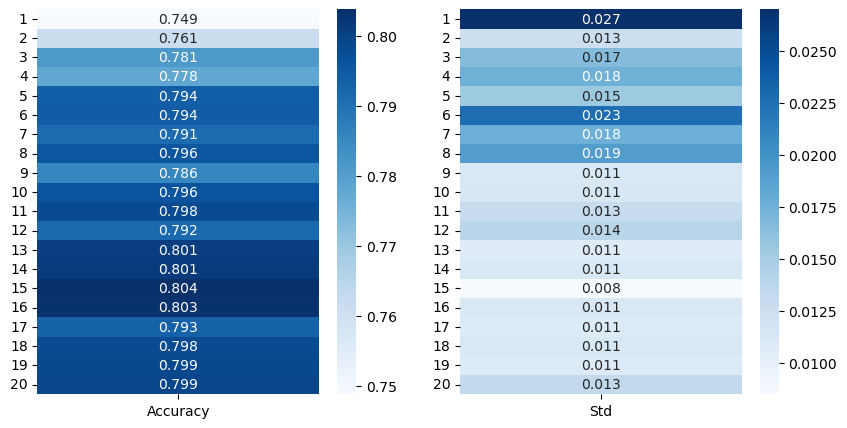

In [466]:
# Mejor valor para k
best_k = clf_knn_tuned.best_params_['n_neighbors']
acc_best_k = clf_knn_tuned.cv_results_['mean_test_score'][clf_knn_tuned.best_params_['n_neighbors']]
print(f"Mejor valor para k: {best_k} con una exactitud en el subconjunto de test de: {round(acc_best_k,3)}")

# Promedio y desciación estándar para cada k como array 1D
means = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
stds = grid_search.cv_results_['std_test_score'].reshape(-1,1)

# Convertimos en dataframe para visualizar el heatmap. Añadimos k_values como índices y nombres de columnas
hm_df = pd.DataFrame(np.hstack((means, stds)), index=k_values, columns=['Accuracy', 'Std'])

# Creamos dos heatmaps separados (means y stds) para aplicar cmaps diferentes
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.heatmap(hm_df[['Accuracy']], annot=True, cmap='Blues', fmt='.3f', ax=ax[0])
sns.heatmap(hm_df[['Std']], annot=True, cmap='Blues', fmt='.3f', ax=ax[1])

# Rotación de yticks
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Con el dataset de _train_, entrenad un clasificador KNN con el mejor hiperparámetro encontrado. 

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.
</div>

In [28]:
# Creamos el modelo KNN
clf_knn_best = KNeighborsClassifier(n_neighbors=15)

clf_knn_best, accuracy_knn_best, confusion_knn_best = train_classifier(clf_knn_best, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

KNN con k=15: GaussianNB: Accuracy en train: 83.12%
GaussianNB: Accuracy en test: 79.00%


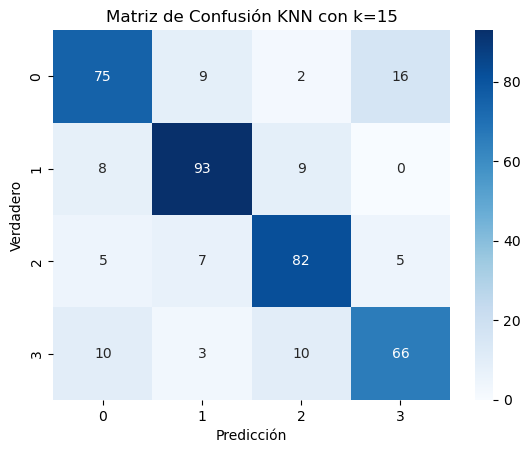

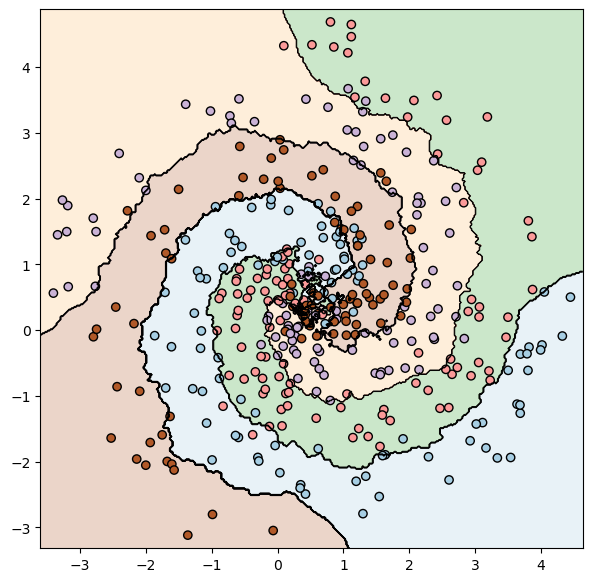

In [30]:
plot_matrix_acc("KNN con k=15",accuracy_knn_best, confusion_knn_best)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_knn_best, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> 

   - Comentar los resultados de la búsqueda del mejor hiperparámetro.
   - ¿Cómo se visualiza gráficamente el cambio del valor `n_neighbors`? ¿Tiene sentido esta diferencia entre los dos gráficos al cambiar el parámetro?
   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>
El mejor resultado obtenido mediante <i>GridSearchCV</i> es aquel que maximiza la media de exactitud sobre el conjunto de test (mean_test_score) para una determinada k. Es importante tener en cuenta que, al utilizar una validación cruzada de 5, calculamos la media de exactitud de las 5 particiones y por eso el resultado 0.803 difiere ligeramente de la exactitud sobre el conjunto de test (0.79 en este caso). <b>El valor óptimo de k es 15</b>, pero valores cercanos obtuvieron una exactitud similar.<br><br>
Al observar las gráficas generadas, podemos notar que para k=15 se obtienen fronteras de decisión más suaves y curvas con menos irregularidades que para k=2. Esto se debe a que al considerar más datos, la predicción de una clase a otra no es tan volátil, ya que la predicción se basa en un mayor número de datos.<br><br>    
Además, se puede apreciar que las fronteras capturan las cuatro clases del conjunto de datos, dispuestas en forma de espiral y, con un valor de exactitud de 0.79, hemos obtenido un modelo que es capaz de detectar patrones en los datos de manera efectiva sin realizar predicciones aleatorias.
</div>

### 1.4. Máquinas de soporte vectorial SVM

Las Support Vector Machine (SVM) se fundamentan en el _Maximal Margin Classifier_, que a su vez, se basan en el concepto de hiperplano.

En un espacio p-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones p-1. El término afín significa que el subespacio no debe pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional. Para dimensiones p>3 no es intuitivo visualizar un hiperplano, pero el concepto de subespacio con p-1 dimensiones se mantiene.

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo.

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como _maximal margin hyperplane_ o hiperplano óptimo de separación, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se debe calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina cómo de lejos está el hiperplano de las observaciones de entrenamiento. El _maximal margin hyperplane_ se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización.

El proceso de optimización tiene la peculiaridad de que sólo las observaciones que se encuentran justo al margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte (_vectors suport_) y son las que definen el clasificador obtenido.

#### Los _kernels_ en SVM

Hay veces en que no hay manera de encontrar un hiperplano que permita separar dos clases. En estos casos decimos que las clases no son linealmente separables. Para resolver este problema podemos utilizar el truco del núcleo .

El truco del núcleo (_kernel trick_) consiste en utilizar una dimensión nueva en la que podamos encontrar un hiperplano para separar las clases. Se puede ver un un ejemplo en: https://www.youtube.com/watch?v=OdlNM96sHio

Al igual que en el algoritmo visto anteriormente (KNN), las SVM también dependen de varios hiperparámetros. 

En este caso intentaremos optimizar dos hiperparámetros:

  - **C**: es la regularización, es decir, el valor de penalización de los errores en la clasificación. Indica el compromiso entre obtener el hiperplano con el margen más grande posible y clasificar el máximo número de ejemplos correctamente. Probaremos los valores: 0.01, 0.1, 1, 10, 50, 100 y 200.
  
  - **Gama**: coeficiente que multiplica la distancia entre dos puntos en el kernel radial. Para decirlo a "grosso modo", cuanto más pequeño es gama, más influencia tienen dos puntos cercanos. Probaremos los valores: 0.001, 0.01, 0.1, 1 y 10.
  
Al igual que en el caso anterior, para validar el rendimiento del algoritmo con cada combinación de hiperparámetros utilizaremos validación cruzada (_cross-validation_) con 4 particiones estratificadas.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> 

Cálcular del valor óptimo de los hiperparámetros _C_ y _gama_. Utilizad una búsqueda de rejilla con validación cruzada para encontrar los valores óptimos. Para cada combinación de valores, calcular su promedio y la desviación estándar. Haced un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.

Podéis utilizar el módulo `GridSearchCV` de `sklearn` el cálculo de los mejores hiperparámetros con el clasificador SVC (de `SVM` de `sklearn`), y `heatmap` de `Seaborn`.
</div>

In [343]:
from sklearn.svm import SVC

# Valores para c y gama que queremos probar
c_values = [0.01, 0.1, 1, 10, 50, 100, 200]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Parámetros para GridSearchCV
parameters = {'C': c_values, 'gamma': gamma_values}

# Creamos el modelo SVC
clf_svm = SVC()

# GridSearchCV con cross validation (cv) de 4
grid_search_svm = GridSearchCV(clf_svm, parameters, cv=4, scoring='accuracy')

clf_svm, accuracy_svm, confusion_svm = train_classifier(grid_search_svm, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Mejor valor para C: 50 y mejor valor para gamma: 1


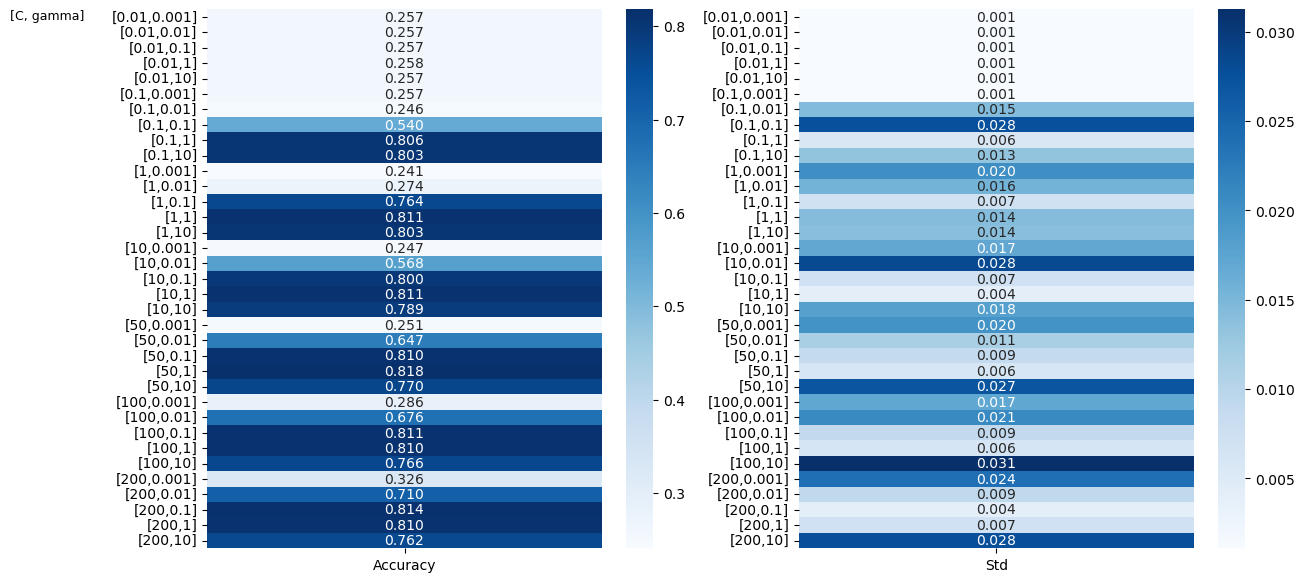

In [58]:
# Mejores valor para C y gamma
best_c = clf_svm.best_params_['C']
best_gamma = clf_svm.best_params_['gamma']
print(f"Mejor valor para C: {best_c} y mejor valor para gamma: {best_gamma}")

# Promedio y desciación estándar para cada combinacion como array 1D
means_svm = grid_search_svm.cv_results_['mean_test_score'].reshape(-1,1)
stds_svm = grid_search_svm.cv_results_['std_test_score'].reshape(-1,1)

# Creamos los índices [c_values*gamma_values]
index_svm = ["[" + str(c) + "," + str(g)+ "]" for c in c_values for g in gamma_values]

# Convertimos en dataframe para visualizar el heatmap. Añadimos los índices y nombres de columnas
hm_df_svm = pd.DataFrame(np.hstack((means_svm, stds_svm)), index=index_svm, columns=['Accuracy', 'Std'])

# Creamos dos heatmaps separados (means y stds) para aplicar cmaps diferentes
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))
sns.heatmap(hm_df_svm[['Accuracy']], annot=True, cmap='Blues', fmt='.3f', ax=ax[0])
sns.heatmap(hm_df_svm[['Std']], annot=True, cmap='Blues', fmt='.3f', ax=ax[1])

# Rotación de yticks
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].text(-0.5, 1, '[C, gamma]', fontsize=9, transform=ax[0].transAxes, va='top', ha='left')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Con el dataset de _train_, entrenad un modelo de SVM con la mejor combinación de parámetros encontrada. 

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.
</div>

In [33]:
# Creamos el modelo SVM
clf_svm_best = SVC(C=50, gamma=1)

clf_svm_best, accuracy_svm_best, confusion_svm_best = train_classifier(clf_svm_best, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

SVM con C=50 y gamma=1: GaussianNB: Accuracy en train: 85.25%
GaussianNB: Accuracy en test: 77.00%


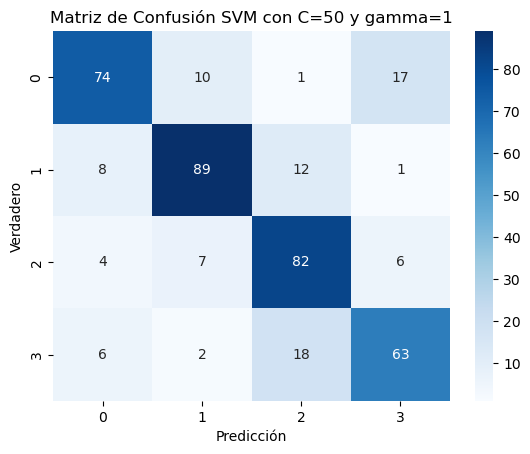

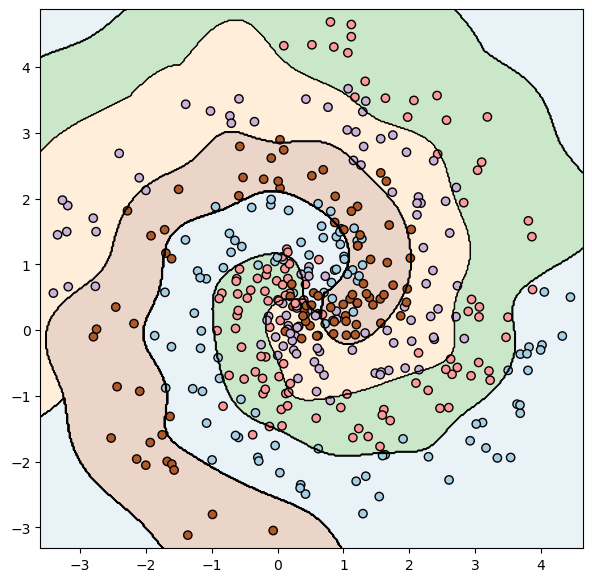

In [35]:
plot_matrix_acc("SVM con C=50 y gamma=1",accuracy_svm_best, confusion_svm_best)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_svm_best, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - Comentar los resultados de la búsqueda de los mejores hiperparámetros.
   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>
En este caso, al buscar los hiperparámetros óptimos para el modelo SVM, se encontró el valor de C de 50 y el valor de gamma de 1. En general, se observó que los valores de gamma 0.1 y 1 obtuvieron mejores resultados para diferentes valores de C en la media de exactitud en el conjunto de prueba. Además, para los mejores valores de C y gamma, se obtiene una desviación estándar muy baja de solo 0.006.<br><br>
<b>Las fronteras de decisión generadas por este modelo son suaves y no lineales</b>, a diferencia del modelo KNN anterior que presentaba muchas irregularidades. Esto se debe a que SVM se rige por el <i>maximal margin hyperplane</i>, es decir, el margen entre los datos de diferentes clases, por lo que la frontera se define en función de la distancia entre los datos de distintas clases.<br><br>
El modelo SVM logra una exactitud de predicción de 0.77 en el conjunto de prueba, lo que indica que el modelo es capaz de hacer predicciones precisas hasta cierto punto.
</div>

### 1.5. Árboles de decisión

Los árboles de decisión son modelos predictivos formados por reglas binarias (si / no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Los árboles pueden ser **clasificadores** (para clasificar clases, tales como nuestro ejemplo), o bien **regresores** (para predecir variables continuas).

#### Construcción de un árbol

La creación de las ramificaciones de los árboles se logra mediante el algoritmo de *recursive binary splitting*. Este algoritmo consta de tres pasos principales:

   - El proceso se inicia en lo alto del árbol, donde todas las observaciones pertenecen a la misma región.
   - Se identifican todos los posibles puntos de corte para cada uno de los predictores. Los puntos de corte son cada uno de sus niveles.
   - se evalúan las posibles divisiones de cada predictor de acuerdo a una determinada medida. En el caso de los clasificadores se utilizan: *classification error rate*, Gini, entropía, chi-square.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Con el dataset de _train_, entrenad un arbol de desición. Podéis utilizar el clasificador `DecisionTreeClassifier` (de `tree` de `sklearn`).

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_. 
    
- Representad el árbol. Podéis utilizar el comando `plot.tree` de la biblioteca `tree` de `sklearn`.
</div>

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creamos el modelo decision tree, usamos random state para replicar los resultados
clf_tree = DecisionTreeClassifier(random_state=42)

clf_tree, accuracy_tree, confusion_tree = train_classifier(clf_tree, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Decision Tree: GaussianNB: Accuracy en train: 100.00%
GaussianNB: Accuracy en test: 71.75%


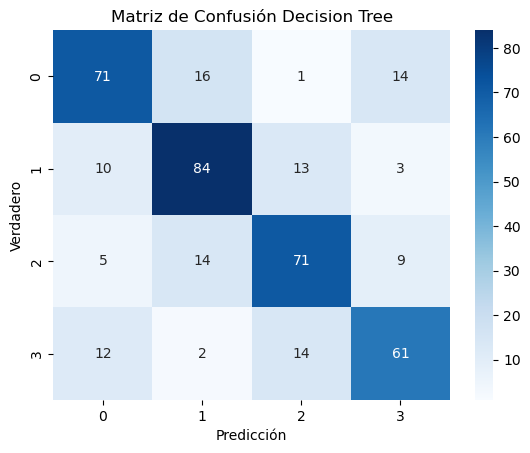

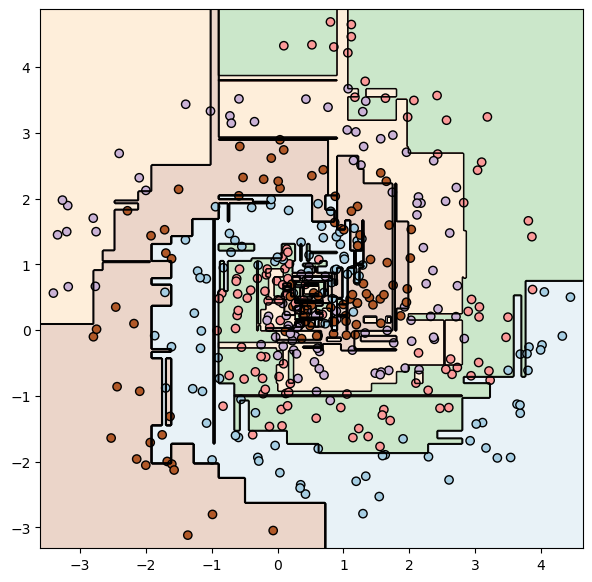

In [38]:
plot_matrix_acc("Decision Tree",accuracy_tree, confusion_tree)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_tree, X_test, y_test)

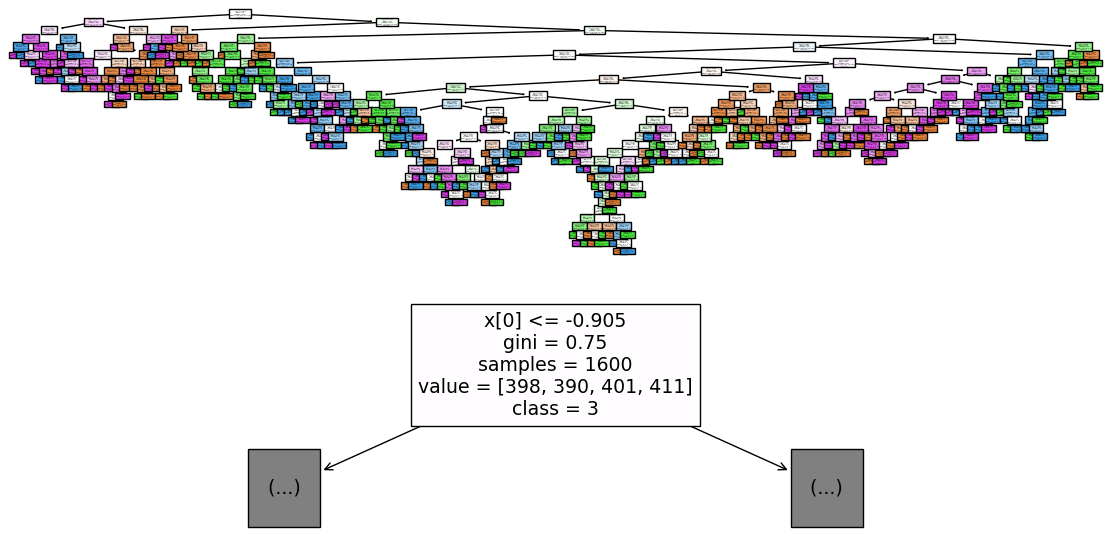

In [91]:
# Visualización del árbol de decisión
plt.figure(figsize=(14, 7))
plt.subplot(2,1,1)
plot_tree(clf_tree, filled=True, class_names=["0", "1", "2", "3"])
plt.subplot(2,1,2)
plot_tree(clf_tree, max_depth=0, filled=True, class_names=["0", "1", "2", "3"])
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> 

   - Comentad los resultados.

</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
<b>El modelo de árbol de decisión sufre de overfitting</b>, como es común en este tipo de modelos. Se puede observar una clara diferencia en la exactitud entre el conjunto de entrenamiento y el de prueba, con una exactitud de 100% en el conjunto de entrenamiento y del 71.75% en el conjunto de prueba. Además, las fronteras de decisión se basan en condiciones if-else, lo que facilita que el modelo se este sobreajustando a los datos de entrenamiento. Un ejemplo de esto se puede observar en la parte inferior de la gráfica, donde la frontera de decisión separa dos clases para un valor de x[0] de alrededor de 0.6 y un valor de  x[1] menor de aproximandamente -2.6. Esta definición if-else es demasiado estricta y lineal para los datos, que tienen una forma de espiral suave.
</div>

#### Evitando el *overfitting*

El proceso de construcción de árboles descrito tiende a reducir rápidamente el error de entrenamiento, por lo que generalmente el modelo se ajusta muy bien a las observaciones utilizadas como entrenamiento (conjunto de *train*). Como consecuencia, los árboles de decisión tienden al *overfitting*. 

Para prevenirlo, utilizaremos dos hiperparámetros:

   - `max_depth`: la profundidad máxima del árbol. Exploraremos los valores entre 4 y 10.
   - `min_samples_split`: el número mínimo de observaciones que debe tener una hoja del árbol para poder dividir. Exploraremos los valores: 2, 10, 20, 50 y 100.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Calculad el valor óptimo de los hiperparámetros `max_depth` y `min_samples_split`. Utilizad una búsqueda de rejilla con validación cruzada para encontrar los valores óptimos. Para cada combinación de valores, calcular su promedio y la desviación estándar. Haced un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.
    
Pódeis utilizar el módulo `GridSearchCV` de `sklearn` el cálculo de los mejores hiperparámetros con el clasificador `DecisionTreeClassifier` (de `tree` de `sklearn`), y `heatmap` de `Seaborn`.
</div>

In [92]:
# Valores para max_depth y min_samples_split que queremos probar
max_depth_values = list(range(4, 11))
min_samples_split_values = [2, 10, 20, 50, 100]

# Parámetros para GridSearchCV
parameters = {'max_depth': max_depth_values, 'min_samples_split': min_samples_split_values}

# Creamos el modelo de arbol de decision, con random_state para replicar los resultados
clf_tree_ft = DecisionTreeClassifier(random_state=42)

# GridSearchCV con cross validation (cv) de 4
grid_search_tree_ft = GridSearchCV(clf_tree_ft, parameters, cv=4, scoring='accuracy')

clf_tree_ft, accuracy_tree_ft, confusion_tree_ft = train_classifier(grid_search_tree_ft, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Mejor valor para max_depth: 10 y mejor valor para min_samples_split: 2


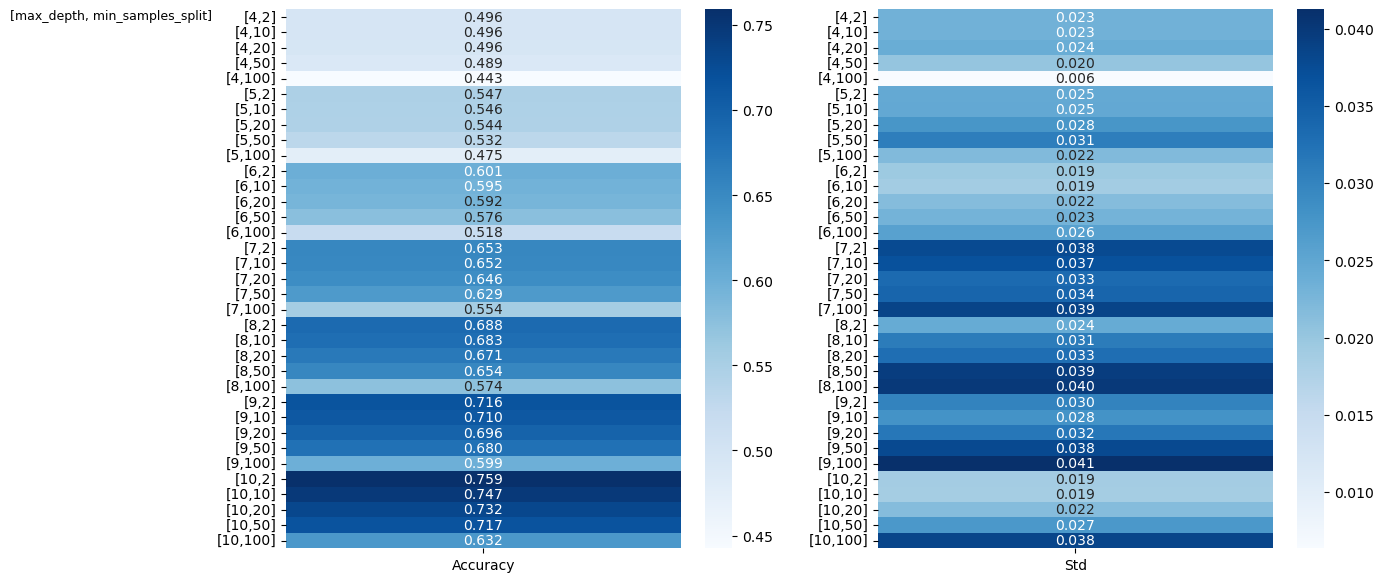

In [102]:
# Mejores valor para max_depth y min_samples_split
best_max_depth = clf_tree_ft.best_params_['max_depth']
best_min_samples_split = clf_tree_ft.best_params_['min_samples_split']
print(f"Mejor valor para max_depth: {best_max_depth} y mejor valor para min_samples_split: {best_min_samples_split}")

# Promedio y desciación estándar para cada k como array 1D
means_tree_ft = grid_search_tree_ft.cv_results_['mean_test_score'].reshape(-1,1)
stds_tree_ft = grid_search_tree_ft.cv_results_['std_test_score'].reshape(-1,1)

# Creamos los índices [c_values*gamma_values]
index_tree_ft = ["[" + str(d) + "," + str(s)+ "]" for d in max_depth_values for s in min_samples_split_values]

# Convertimos en dataframe para visualizar el heatmap. Añadimos los índices y nombres de columnas
hm_df_tree_ft = pd.DataFrame(np.hstack((means_tree_ft, stds_tree_ft)), index=index_tree_ft, columns=['Accuracy', 'Std'])

# Creamos dos heatmaps separados (means y stds) para aplicar cmaps diferentes
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))
sns.heatmap(hm_df_tree_ft[['Accuracy']], annot=True, cmap='Blues', fmt='.3f', ax=ax[0])
sns.heatmap(hm_df_tree_ft[['Std']], annot=True, cmap='Blues', fmt='.3f', ax=ax[1])

# Rotación de yticks
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].text(-0.7, 1, '[max_depth, min_samples_split]', fontsize=9, transform=ax[0].transAxes, va='top', ha='left')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Con el dataset de _train_, entrenad un árbol de desición con la mejor combinación de parámetros encontrada.

- Calculad el _accuracy_ del modelo obtenido sobre _train_ y _test_.

- Calculad la matriz de confusión sobre _test_.
    
- Representad gráficamente la frontera de decisión con el de _test_.
    
- Representad el árbol. 
    
</div>

In [39]:
# Creamos el modelo decision tree con los mejores hiperparametros obtenidos
clf_tree_best = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)

clf_tree_best, accuracy_tree_best, confusion_tree_best = train_classifier(clf_tree_best, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Decision Tree max_depth=10 y min_samples_split=2: GaussianNB: Accuracy en train: 85.44%
GaussianNB: Accuracy en test: 69.75%


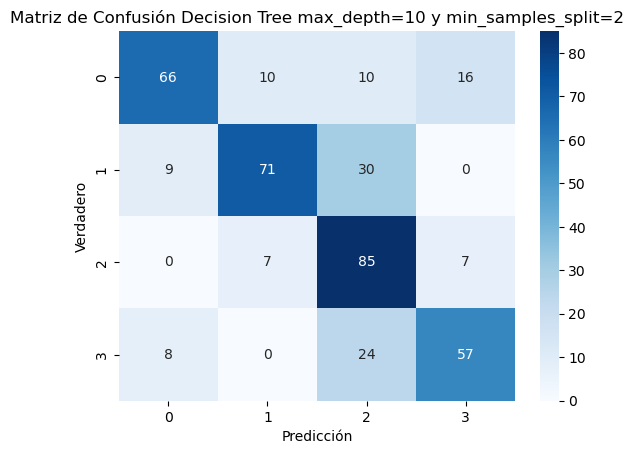

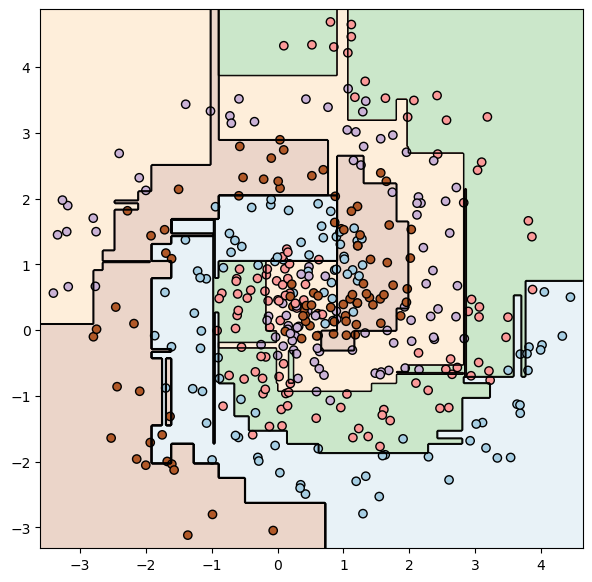

In [40]:
plot_matrix_acc("Decision Tree max_depth=10 y min_samples_split=2",accuracy_tree_best, confusion_tree_best)

# Llamamos a la función plot_decision_boundary para gráficar las fronteras
plot_decision_boundary(clf_tree_best, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - Comentar los resultados de la búsqueda de los mejores hiperparámetros.
   - ¿Cómo son las fronteras de decisión? ¿Tiene sentido que tengan esta forma con el algoritmo utilizado?
   - ¿Cómo son las predicciones obtenidas sobre el conjunto de test?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
La función GridSearchCV se encarga de probar diferentes combinaciones de parámetros para un modelo y retorna aquel que devuelve una mejor exactitud media sobre el conjunto de test. En este caso, aunque parece que el árbol de decisión ha disminuido la exactitud de entrenamiento (evitando algo de overfitting), no ha mejorado la exactitud de prueba. Esto se debe a que el valor de <i>max_depth=10</i> (propuesto como mejor por GridSearchCV dentro del rango de valores de 4 a 10) predice peor sobre estos datos que el valor por defecto de <i>max_depth=None</i>, que expande los nodos hasta todas las hojas.<br><br>
Las fronteras de decisión son lineales debido a las condiciones if-else, aunque se puede apreciar cierto patrón de espiral en la gráfica, el uso de <b>if-else es demasiado estricto para los datos</b>.<br><br>
En general, las predicciones no son muy precisas, obteniendo una exactitud en el conjunto de prueba de 0.70. El modelo es capaz de detectar cierto patrón, pero solo hasta cierto punto.
</div>

<a id='ej2'></a>
# 2. Implementación del caso práctico (5 puntos)

Como experto en análisis de datos, sabemos la importancia de que las empresas de tarjetas de crédito puedan identificar y prevenir transacciones fraudulentas para proteger a sus clientes. En este sentido, estudiaremos un conjunto de datos que contiene información sobre transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Este conjunto de datos presenta transacciones ocurridas en dos días, donde se registraron 492 casos de fraude de un total de 284,807 transacciones. Es importante destacar que todas las variables de entrada son numéricas y fueron obtenidas a través de una transformación PCA. Lamentablemente, debido a razones de confidencialidad, no se pueden proporcionar las características originales ni más información sobre los datos. Las variables V1 a V28 representan los componentes principales obtenidos con PCA, mientras que "Time" e "Amount" son las únicas variables que no han sido transformadas con PCA. La variable "Time" indica los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos, mientras que "Amount" representa el monto de la transacción. La variable "Class" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Fuente: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## 2.0. Carga de datos

Lo primero que haremos será cargar el conjunto de datos, visualizar las primeras filas, y verificar:

- La cantidad total de filas y columnas en el DataFrame.
- El nombre de cada columna del DataFrame.
- El número de valores no nulos en cada columna.
- El tipo de datos de cada columna, que puede ser int, float, object, entre otros.
- La cantidad de memoria utilizada por el DataFrame.

In [6]:
import numpy as np 
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 2.1. Preprocesado de datos y análisis exploratorio

El preprocesado y análisis exploratorio de los datos es un paso crítico y fundamental en cualquier proyecto de análisis de datos o de aprendizaje automático. Ayuda a los investigadores a comprender mejor los datos, descubrir patrones y relaciones, identificar problemas y seleccionar las técnicas de análisis adecuadas para el conjunto de datos

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> 

Calculad las frecuencias de la variable _target_ (`Class`) y haced un gráfico de barras.

In [63]:
# Calculo de las frecuencias de la variable Class, al normalizar obtenemos el porcentaje
freq = data['Class'].value_counts(normalize=True) * 100

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

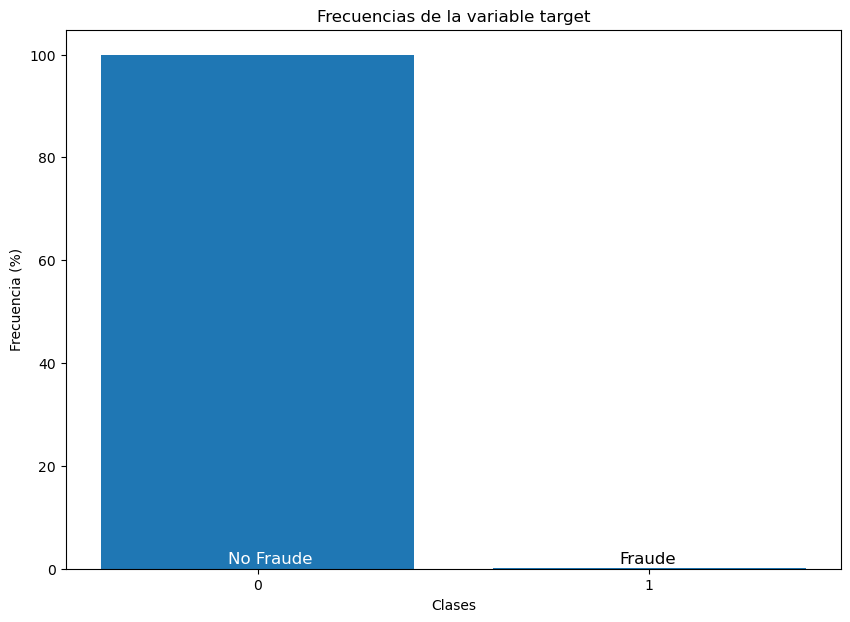

In [94]:
# Gráfico de barras
plt.figure(figsize=(10,7))
plt.bar(['0', '1'], freq.values)
plt.title('Frecuencias de la variable target')
plt.text(-0.075, 1, 'No Fraude', fontsize=12, color='white')
plt.text(1-0.075, 1, 'Fraude', fontsize=12, color='black')
plt.xlabel('Clases')
plt.ylabel('Frecuencia (%)')
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> 

Analizar la distribución de las variables descriptoras. Representa gráficamente el histograma de las 30 variables separándo las observaciones según la clase a la que pertenece. Organiza todos los histogramas en 10 filas y 3 columnas.
</div>

In [188]:
def plot_descriptive_variables():
    # Creamos 10 filas con 3 columnas
    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 25))

    # Recorremos todas las variables descriptoras
    for i, column in enumerate(data.columns[:-1]):
        row = i // 3
        col = i % 3

        # Tomamos solo las columnas de interés
        target_ = data[[column, 'Class']]

        # Separamos los datos por clase
        data_class0 = target_[target_['Class'] == 0]
        data_class1 = target_[target_['Class'] == 1]

        # Dibujamos el histograma
        axes[row, col].hist(data_class0[column], bins=20, alpha=0.5, color='blue', density=True)
        axes[row, col].hist(data_class1[column], bins=20, alpha=0.5, color='red', density=True)
        axes[row, col].set_title(f'Histograma de {column}')
        axes[row, col].legend(['Class 0', 'Class 1'])
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

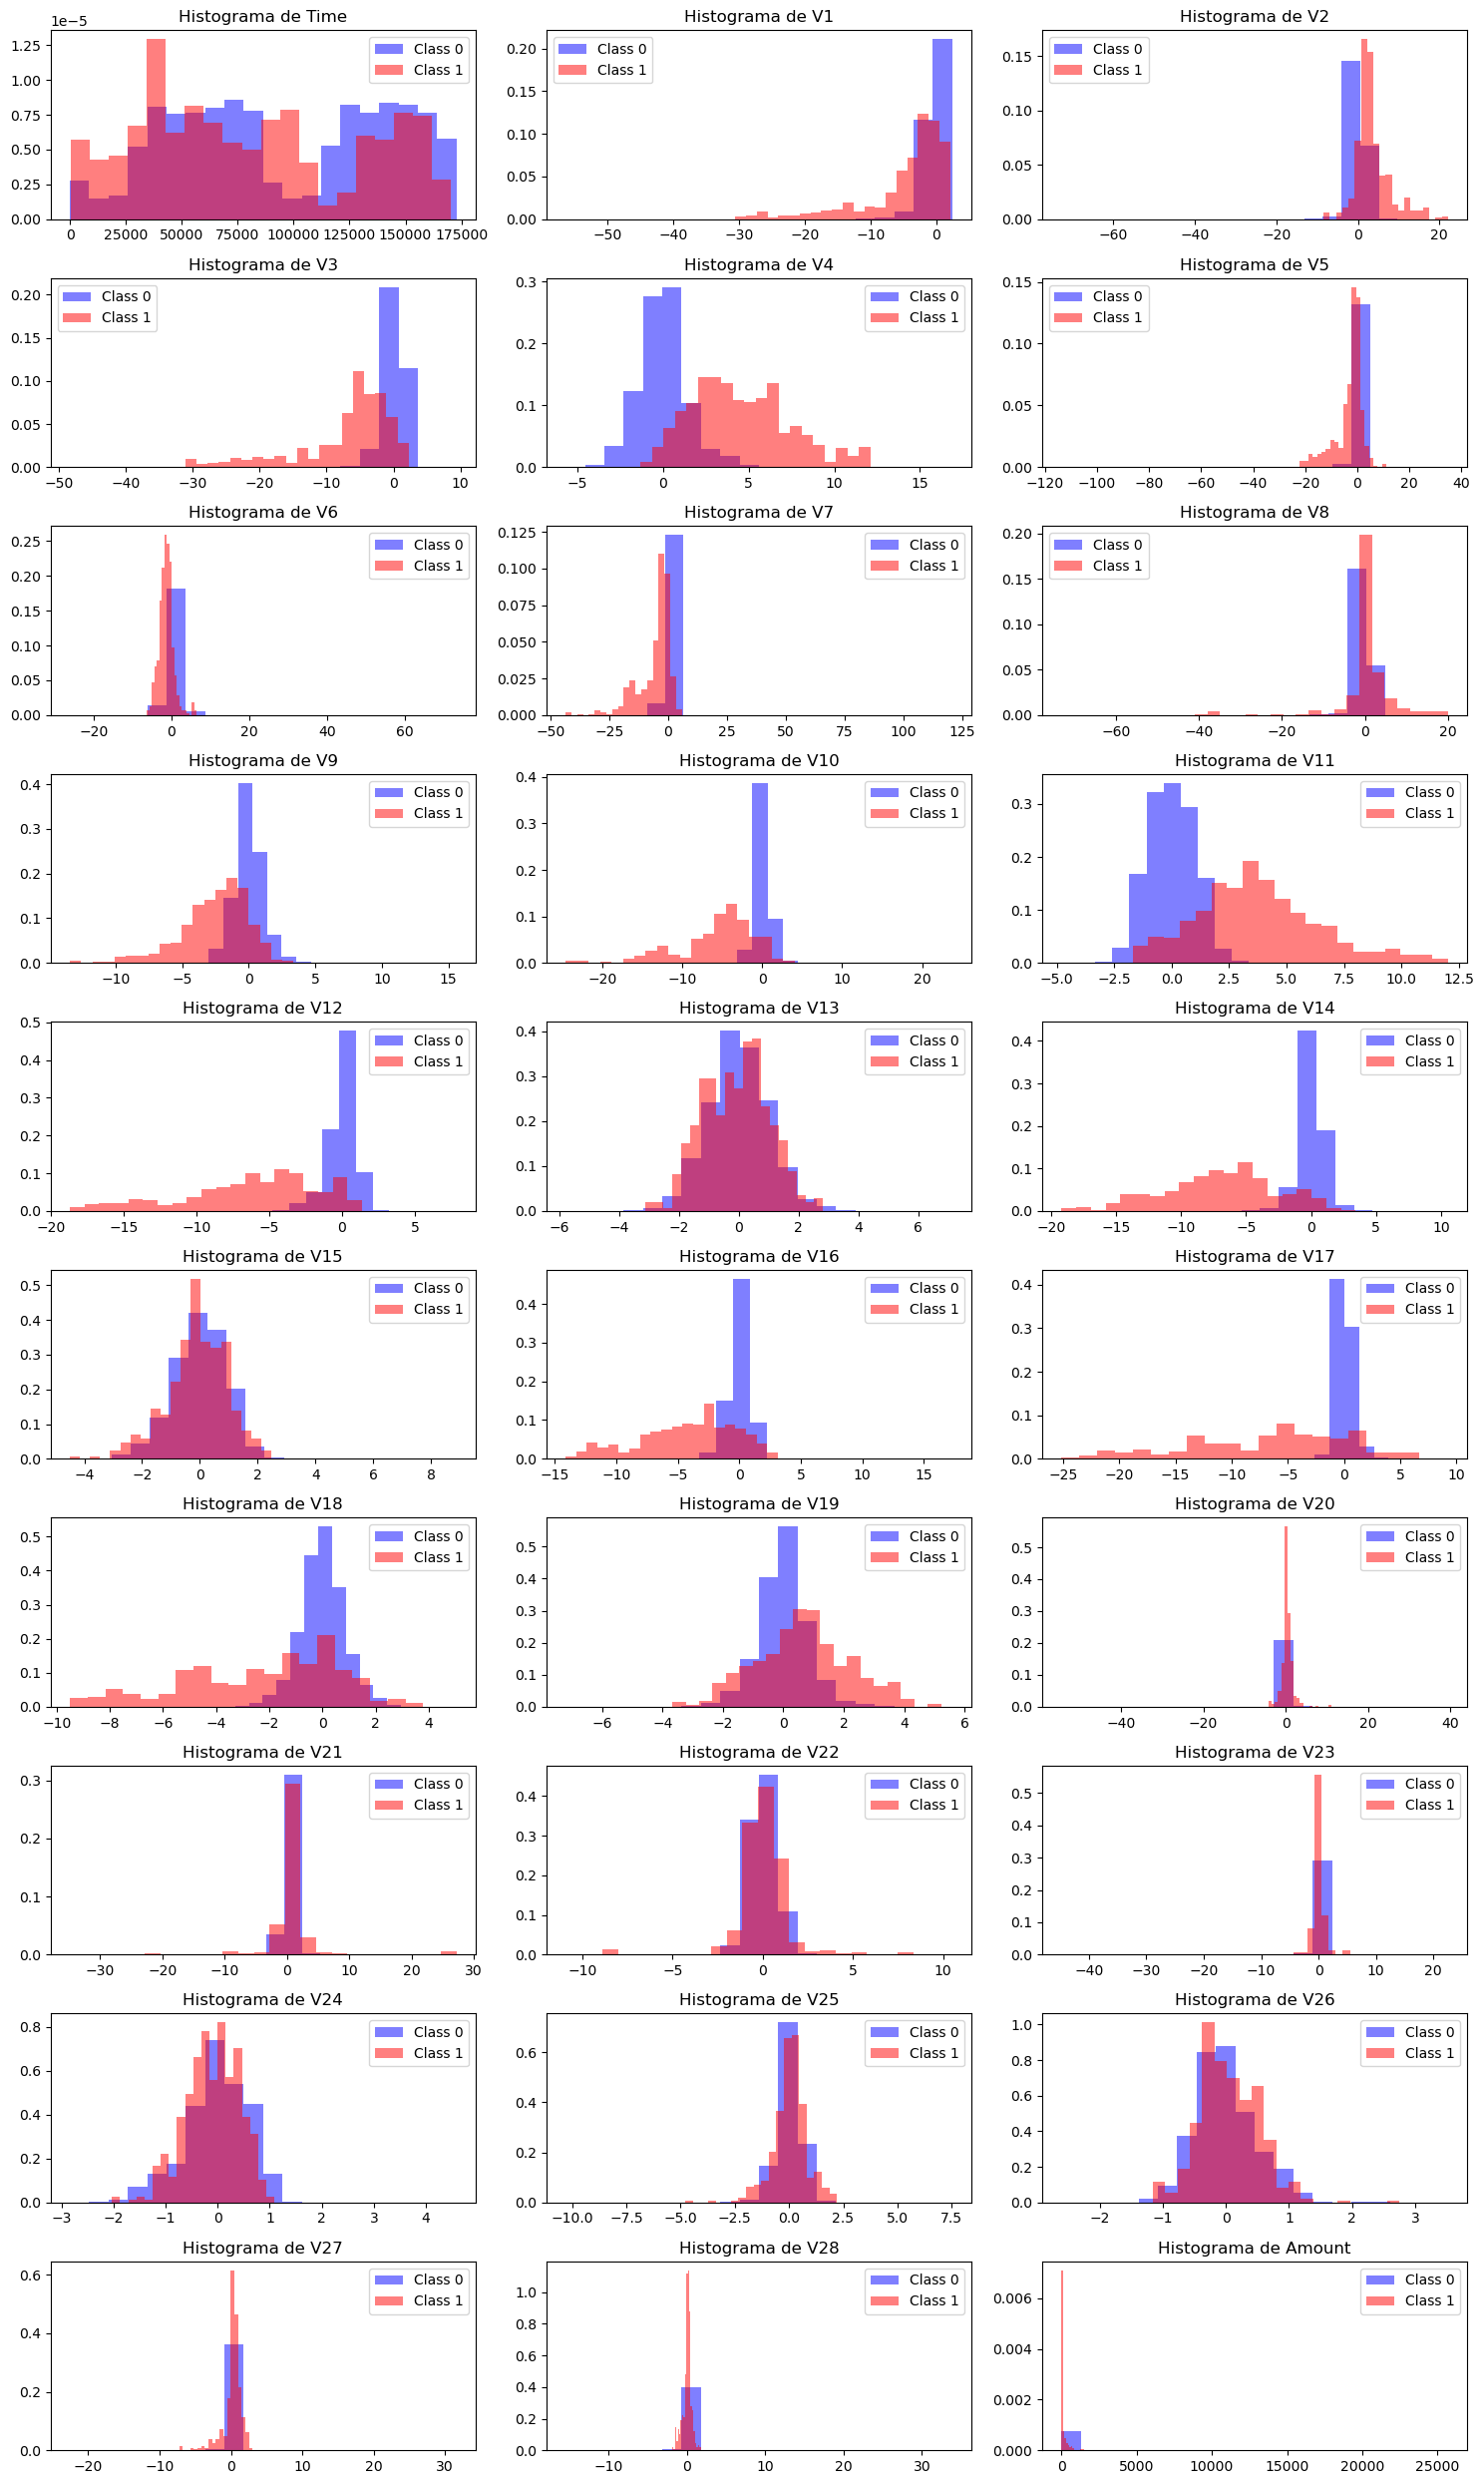

In [189]:
plot_descriptive_variables()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Cómo es la relación de la frecuencias de la variable `Class`?
   - ¿Qué información nos proporcionan los histogramas?, ¿Existe otra forma de visualización que pudiera ser útil, en este caso?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
Encontramos que hay claras diferencias entre las operaciones fraudulentas y las que no lo son, destacando las variables descriptoras V10, V12, V14, V16 y V17. En cuanto a las variables conocidas, parece que <i>Time</i> no es demasiado relevante y que <i>Amount</i>, simplemente tiene varios valores cercanos a 0 en las transacciones fraudulentas. <br><br>
La información visual proporcionada por el histograma nos permite detectar transacciones sospechosas a simple vista. Por ejemplo, un valor de V1 de -30 puede er sospechoso, aunque no indica fraude definitivamente, pero al combinarlo con otras variables podemos determinarlo con mayor exactitud.<br><br>
Otras formas de visualización útiles podría ser realizar un <i>scatterplot</i> o gráficar la correlación entre las variables descriptivas y la variable objetivo (Class). En la correlación, se nos indicaría qué variables tienen mayor influencia en la predicción de si una transacción es fraudulenta o no. En este caso, <b>utilizaría el valor absoluto de la correlación para identificar la influencia que tienen</b>, ya que es indiferente si la correlación es directa o inversa. Aquí una ejemplo de cómo podría ser esta visualización:
</div>

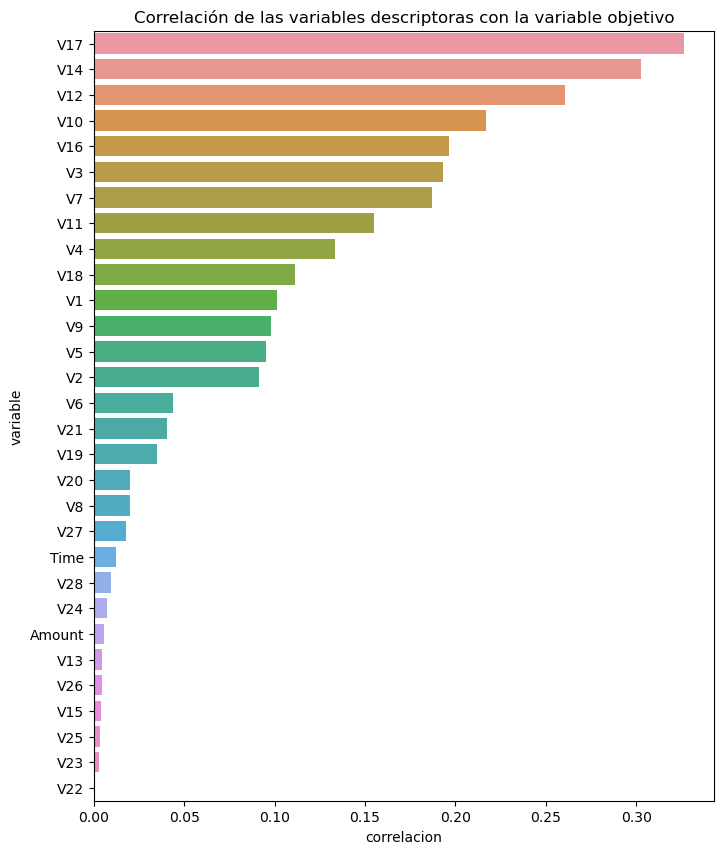

In [158]:
# Creamos un dataframe con la correlación de cada variable descriptoras con la variable target
# Usamos el valor absoluto ya que nos es igual si es directamente o inversamente proporcional
corr_df = abs(data.drop('Class', axis=1).corrwith(data['Class'])).reset_index()
corr_df.columns = ['variable', 'correlacion']
corr_df = corr_df.sort_values('correlacion', ascending=False)

# Creamos una segunda visualizacion
plt.figure(figsize=(8,10))
sns.barplot(x='correlacion', y='variable', data=corr_df, orient='h')
plt.title('Correlación de las variables descriptoras con la variable objetivo')
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Los datos en bruto presentan algunos problemas. En primer lugar, las columnas `Time` y `Amount` son demasiado variables para utilizarlas directamente. Eliminad la columna `Time` (ya que no está claro qué significa) y tomad el logaritmo de la columna `Amount` para reducir su rango.
    
Para evitar la indeterminación "log(0)", sumádle 1 céntimo de dolar (0.001) a la columna `Amount` antes de calcular el logaritmo. No olvidéis que finalmente tenéis que reemplazar la columna `Amount` por `Log Amount`
</div>

In [42]:
# eliminamos la columna Time
data = data.drop('Time', axis=1)

# aplicamos el logaritmo a la columna Amount sumando 1 céntimo
data['Log Amount'] = np.log(data['Amount'] + 0.001)

# eliminamos la columna Amount original
data = data.drop('Amount', axis=1)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [191]:
print(f"Las nuevas columnas del dataframe son: {list(data.columns)}")
data['Log Amount'].head()

Las nuevas columnas del dataframe son: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Log Amount']


0    5.008105
1    0.989913
2    5.936641
3    4.816249
4    4.248367
Name: Log Amount, dtype: float64

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Separad los descriptores de la respuesta. Nombrad los conjuntos como: X, y.

- Dividid el _dataset_ en dos subconjuntos, __*train*__ (80% de los datos) y __*test*__ (20% de los datos). Nombrad los conjuntos como: X_train, X_test, y_train, y_test. Podéis utlizar la función `train_test_split`de la biblioteca `model_selection`de `sklearn`. Utilizad la opción `random_state = 24` y aseguraros que la división sea estratificada, es decir, que se mantenga la misma proporción de clases tanto en el conjunto de entrenamiento como en el de prueba.

Tened en cuenta que la matrices de las clases `y_train` e `y_test` deben estar codificadas. La función `to_categorical` de la librería `TensorFlow` de `Keras` se utiliza para convertir una matriz de etiquetas de clase (enteros) en una matriz de etiquetas de clase codificadas en one-hot.

La codificación one-hot es un proceso mediante el cual las etiquetas categóricas se convierten en vectores binarios, donde cada vector tiene una longitud igual al número de clases. Cada vector tiene un valor de 1 en la posición correspondiente a la clase y un valor de 0 en todas las demás posiciones. Esto se hace para permitir que los modelos de aprendizaje automático comprendan mejor la estructura de las etiquetas categóricas.  
</div>

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Separamos descriptores de la respuesta
X = data.drop('Class', axis=1)
y = data['Class']

# Dividimos el dataset en entrenamiento y prueba, con una division estratificada
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)


# Codificamos las clases utilizando la función to_categorical
y_train = to_categorical(y_train_s)
y_test = to_categorical(y_test_s)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [353]:
# Comprobamos que la estratificación es correcta
ratio_y_equal_1 = sum(data['Class'] == 1) / data.shape[0]
print(f"El porcentaje de transacciones fraudulentas totales es de {ratio_y_equal_1}")

n_y_train_fraud = sum(y_train_s == 1)
t_y_train_fraud = y_train.shape[0] * ratio_y_equal_1
print(f"El porcentaje de fraude en y_train es {n_y_train_fraud} y debería de coincidir con: {round(t_y_train_fraud)}")

n_y_test_fraud = sum(y_test_s == 1)
t_y_test_fraud = y_test.shape[0] * ratio_y_equal_1
print(f"El porcentaje de fraude en y_train es {n_y_test_fraud} y debería de coincidir con: {round(t_y_test_fraud)}")

El porcentaje de transacciones fraudulentas totales es de 0.001727485630620034
El porcentaje de fraude en y_train es 394 y debería de coincidir con: 394
El porcentaje de fraude en y_train es 98 y debería de coincidir con: 98


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Normalizad los descriptores utilizando `StandardScaler`de `sklearn`. 
- Mostrad las dimensiones del conjunto de descriptores original, del conjunto de entrenamiento y del conjunto de prueba.
    
<strong>Nota:</strong> Recordad que el `StandardScaler` sólo se ajusta utilizando los descriptores de entrenamiento para evitar fugas de información o "data leakage". La fuga de información se produce cuando se utiliza información de los datos de prueba o validación para ajustar el modelo. En otras palabras, si se ajusta el modelo de escalado con todo el conjunto de datos, se estaría utilizando información de prueba o validación para el ajuste, lo que podría hacer que el modelo parezca más preciso de lo que realmente es.

</div>

In [44]:
from sklearn.preprocessing import StandardScaler

# Normalizamos sobre los descriptores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [355]:
print("Dimensiones del conjunto de descriptores original: ", X.shape)
print("Dimensiones del conjunto de entrenamiento: ", X_train.shape)
print("Dimensiones del conjunto de prueba: ", X_test.shape)

Dimensiones del conjunto de descriptores original:  (284807, 29)
Dimensiones del conjunto de entrenamiento:  (227845, 29)
Dimensiones del conjunto de prueba:  (56962, 29)


## 2.2. Entrenamiento, validación y prueba de una red neuronal con los datos originales

Como herramienta de clasificación que nos permita predecir si una transacción es fraudulenta o no, utilizaremos un perceptrón multicapa. Un perceptrón multicapa (MLP, por sus siglas en inglés) es una red neuronal artificial compuesta por múltiples capas de unidades de procesamiento (neuronas), donde cada capa está conectada a la siguiente capa a través de un conjunto de conexiones ponderadas. El MLP es capaz de realizar tanto tareas de clasificación como de regresión al aprender a mapear las entradas a las salidas deseadas a través de una función de activación no lineal. La red utiliza un algoritmo de aprendizaje supervisado que ajusta los pesos de las conexiones durante el entrenamiento para minimizar la diferencia entre las salidas producidas por la red y las salidas deseadas. Debido a su capacidad para modelar relaciones no lineales complejas, el MLP es uno de los modelos más utilizados en el campo del aprendizaje automático.

Crearemos y entrenaremos una red Perceptrón Multicapa (MLP) con 4 capas ocultas de 20 neuronas cada una y con función de activación `relu`. Usaremos la clase `Sequential` de la libreria `keras`para crear el modelo de forma secuencial, es decir, apilando capas una encima de la otra. `Sequential` es la forma más sencilla de crear modelos de redes neuronales en `keras`, ya que no requiere definir la dirección del grafo computacional como ocurre en otros tipos de modelos más complejos.


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Cread el modelo `Sequential`. Agregad las 4 capas ocultas con 20 neuronas cada una utilizando el método `.add()` y función de activación `relu`. Agregad la capa de salida con 2 neuronas de salida (una para la clase 0 y la otra para la clase 1) y función de activación `sigmoid`. Mostrad el resumen de la red creada con el método `.summary()`
- Compilad el modelo utilizando el método `.compile()`, especificando el optimizador `adam`, la función de pérdida `binary_crossentropy` y las métrica de evaluación `accuracy`.
- Entrenad el modelo utilizando el método `.fit()` con `X_train`, especificad el número de épocas en 100 y el tamaño del lote en 2048. Validad su rendimiento haciendo validación cruzada con el 80% de los datos para el entrenamiento. Configura el parámetro `validation_split=0.2`.
- Graficad la pérdida (`loss`) tanto de entrenamiento como de validación en función de las épocas.
- Graficad la exactitud (`accuracy`) tanto de entrenamiento como de validación en función de las épocas.
    
<strong>Nota:</strong> Para la presentación del informe, configurad el parámetro `verbose=0`, para evitar mostrar información durante el entreno.
    
</div>

In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


# Creamos el modelo secuencial
model_mlp = Sequential()
model_mlp.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(2, activation='sigmoid'))

# Mostrar resumen del modelo
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,902
Trainable params: 1,902
Non-trainable params: 0
_________________________________________________________________


In [269]:
# Compilacion del modelo
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model_mlp.fit(X_train, y_train, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

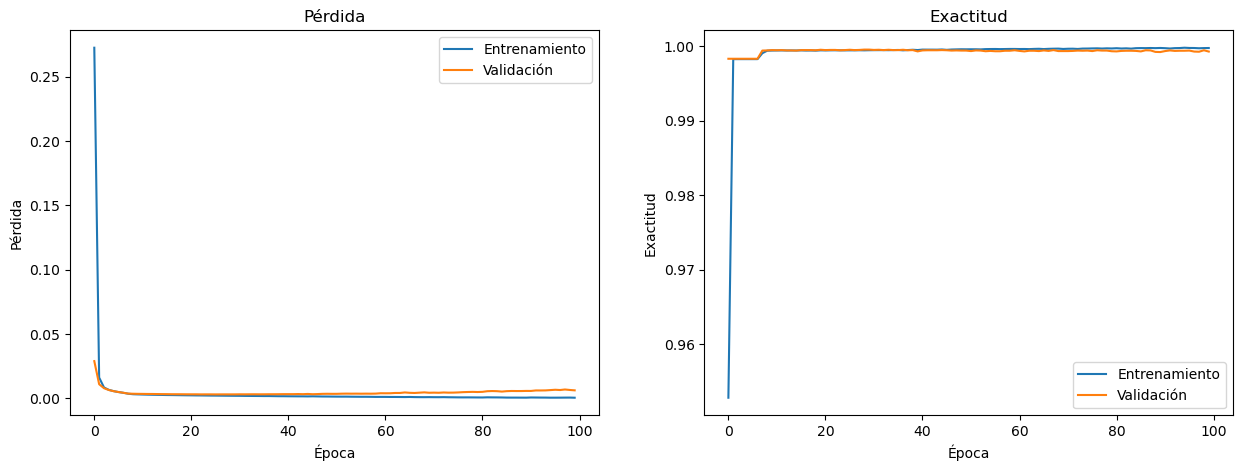

In [273]:
# Graficamos la pérdida  y la exactitud
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

Una vez entrenado y validado el modelo, procederemos a hacer la prueba, es decir, predecir la clase de `X_test`y calcular las medidas de rendimiento

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Predecid la clase de `X_test`, calculad la exacitud de la predicción.
- Calculad la matriz de confusión
    
</div>

In [497]:
# Predecimos X_test
y_pred = model_mlp.predict(X_test, verbose=0)

# Calculamos la exactitud
accuracy = accuracy_score(y_test, np.round(y_pred))

# Creamos la matriz de confusión, convertimos one-hot encoder a una clase
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

La exactitud sobre el conjunto de pruebas es: 0.9992099996488887


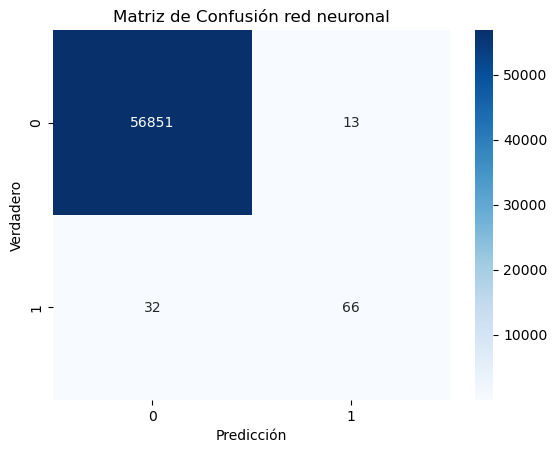

Recall: 0.673469387755102


In [498]:
print(f"La exactitud sobre el conjunto de pruebas es: {accuracy}")
# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión red neuronal')
plt.show()
print(f"Recall: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])}")

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Qué opinas de los resultados?, ¿nos podemos quedar con este modelo como aceptable?
   - ¿Las medidas de rendimiento usadas son aceptables? ¿Que otra medida de rendimiento propondrías?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
Hemos obtenido una exactitud (accuracy) del 99.9% en el conjunto de prueba. Sin embargo, es importante destacar que este resultado se debe en gran medida a que la mayoría de las transacciones son no fraudulentas. Al observar la matriz de confusión, se puede ver que el modelo ha identificado correctamente 66 transacciones fraudulentas, pero ha clasificado erróneamente 33 transacciones fraudulentas como no fraudulentas (falsos negativos). Por lo tanto, aunque este modelo tiene un rendimiento decente, es importante minimizar al máximo las transacciones fraudulentas mal clasificadas, es decir, reducir al mínimo los falsos negativos, ya que es mucho más importante detectar correctamente las transacciones fraudulentas que las transacciones no fraudulentas.<br><br>
    Para lograr este objetivo, se puede <b>utilizar la medida de sensibilidad o <i>recall</i></b>, que mide la proporción de verdaderos positivos sobre el total de positiovs (TP / (TP+FN)). A diferencia de la exactitud, que es la medida utilizada hasta ahora (TP+TN)/(TP+TN+FP+FN).
</div>

## 2.3. Submuestreo

El submuestreo se refiere a la técnica de reducir el número de muestras de la clase mayoritaria para equilibrar la distribución de clases en un conjunto de datos.  Esto se puede lograr eliminando aleatoriamente muestras de la clase mayoritaria.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Reduce el número de observaciones de la clase mayoritaria del conjunto de datos `X_train` hasta que tenga el mismo número de observaciones que la clase minoritaria. Muestra las dimensiones de las nuevas matrices de entrenamiento i la frecuencia de cada clase. Podéis utilizar la fución `resample` dela bibioteca `utils` de `sklearn`
- Cread, entrenad, graficad las pérdidas y exactitud durante el entreno, validad y probad otro modelo `Sequential` con la misma configuración del apartado anterior.
</div>

In [400]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Separamos las clases mayoritaria y minoritaria de X_train
X_train_majority = X_train[np.argmax(y_train, axis=1) == 0]
X_train_minority = X_train[np.argmax(y_train, axis=1) == 1]

# Reducimos las observaciones de la clase mayoritaria al mismo tamaño que la clase minoritaria
X_train_majority_downsampled = resample(X_train_majority, n_samples=X_train_minority.shape[0], random_state=42)

# Combinamos nuevamente las dos clases en X_train y mezclamos
X_train_downsampled = np.concatenate((X_train_majority_downsampled, X_train_minority))
y_train_downsampled = np.concatenate((np.zeros(X_train_majority_downsampled.shape[0]), np.ones(X_train_minority.shape[0])))
X_train_downsampled, y_train_downsampled = shuffle(X_train_downsampled, y_train_downsampled, random_state=42)
y_train_downsampled = to_categorical(y_train_downsampled)

# Mostramos las dimensiones de las nuevas matrices de entrenamiento y la frecuencia
print("Dimensiones de las nuevas matrices de entrenamiento:")
print("X_train_downsampled:", X_train_downsampled.shape)
print("y_train_downsampled:", y_train_downsampled.shape)

print("\nFrecuencia de cada clase en y_train_downsampled:")
print(pd.Series(np.argmax(y_train_downsampled, axis=1)).value_counts())

print(f"\nSe han reducido de {X_train.shape[0]} datos a {X_train_downsampled.shape[0]}")

Dimensiones de las nuevas matrices de entrenamiento:
X_train_downsampled: (788, 29)
y_train_downsampled: (788, 2)

Frecuencia de cada clase en y_train_downsampled:
1    394
0    394
dtype: int64

Se han reducido de 227845 datos a 788


In [401]:
# Creamos el modelo secuencial reducido
model_mlp2 = Sequential()
model_mlp2.add(Dense(20, input_dim=X_train_downsampled.shape[1], activation='relu'))
model_mlp2.add(Dense(20, activation='relu'))
model_mlp2.add(Dense(20, activation='relu'))
model_mlp2.add(Dense(20, activation='relu'))
model_mlp2.add(Dense(2, activation='sigmoid'))

# Compilacion del modelo
model_mlp2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model_mlp2.fit(X_train_downsampled, y_train_downsampled, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

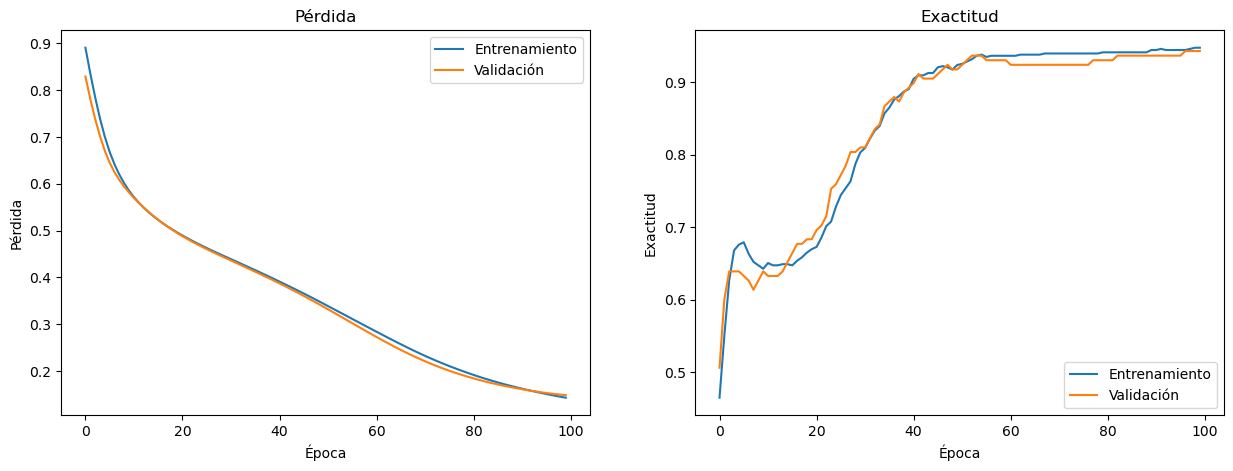

In [403]:
# Graficamos la pérdida  y la exactitud
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

- ¿Porqué crees que se ha hecho un remuestreo solo a los datos de entrenamiento?
- ¿Qué opinas de los resultados?, ¿nos podemos quedar con este modelo como aceptable?
    
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>    
Hemos realizado un remuestreo de los datos de entrenamiento para <b>darle mayor importancia a las transacciones fraudulentas</b>. Al reducir el número de transacciones no fraudulentas, <b>el modelo pudo entrenar con el mismo número de transacciones fraudulentas que las no fraudulentas</b>. Este remuestreo se realizó solo en los datos de entrenamiento, ya que nuestro objetivo era entrenar el modelo con el mismo número de observaciones de cada clase. En el conjunto de prueba no es necesario, ya que queríamos ver cómo predecía el modelo con todo tipo de datos. <br><br>
Los resultados fueron mixtos. En general, la exactitud disminuyó, pero logramos reducir el número de falsos negativos de 32 a 13, que era nuestro objetivo. Aún podríamos intentar minimizar este número aún más. También se predijeron como fraudulentas 1679 transacciones que no lo eran, lo que representa un empeoramiento en comparación con las 13 mal predichas anteriormente. Sin embargo, <b>nuestro objetivo es reducir el número de transacciones fraudulentas que se predicen como no fraudulentas</b>, y al reducir el número de observaciones para mantener el mismo número en cada clase en el conjunto de entrenamiento, logramos esto. En general, el modelo es mejor en comparación con el anterior. Añado la confusión de matriz del nuevo modelo.
</div>

La exactitud sobre el conjunto de pruebas es: 0.9645904287068572


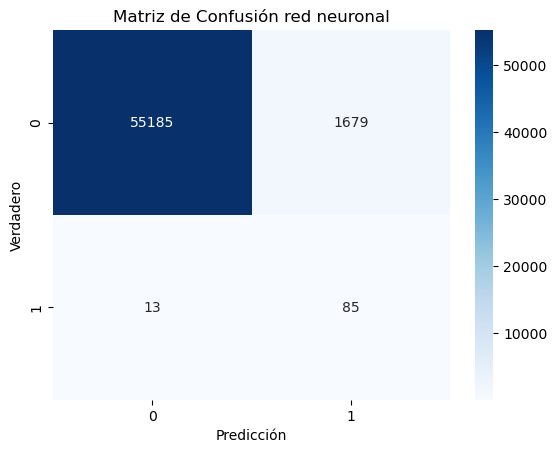

Recall: 0.8673469387755102


In [499]:
# Creamos una función para su posterior uso
def plot_predict_matrix_recall(model, X_test, y_test):
    # Predecimos X_test
    y_pred = model.predict(X_test, verbose=0)

    # Calculamos la exactitud
    accuracy = accuracy_score(y_test, np.round(y_pred))

    # Creamos la matriz de confusión, convertimos one-hot encoder a una clase
    y_test_classes = np.argmax(y_test, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    print(f"La exactitud sobre el conjunto de pruebas es: {accuracy}")
    # Matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt='g',cmap="Blues")
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusión red neuronal')
    plt.show()
    print(f"Recall: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])}")
plot_predict_matrix_recall(model_mlp2, X_test, y_test)

## 2.4. Sobremuestreo

Al contrario que el caso anterior, el sobremuestreo se refiere a la técnica de aumentar el número de muestras de la clase minoritaria para equilibrar la distribución de clases en un conjunto de datos. Esto se puede lograr mediante la replicación de muestras existentes o mediante la generación de muestras sintéticas de las clases minoritarias

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Aumenta el número de observaciones de la clase minoritaria del conjunto de datos `X_train` hasta que tenga el mismo número de observaciones que la clase mayoritaria. Muestra las dimensiones de las nuevas matrices de entrenamiento i la frecuencia de cada clase. 
- Cread, entrenad, , graficad las pérdidas y exactitud durante el entreno, validad y probad otro modelo `Sequential` con la misma configuración del apartado anterior.
</div>

In [434]:
# Separamos las clases mayoritaria y minoritaria de X_train
X_train_majority = X_train[np.argmax(y_train, axis=1) == 0]
X_train_minority = X_train[np.argmax(y_train, axis=1) == 1]

# Aumentamos las observaciones de la clase minoritaria al mismo tamaño que la clase mayoritaria
X_train_minority_upsampled = resample(X_train_minority, n_samples=X_train_majority.shape[0], random_state=42)

# Combinamos nuevamente las dos clases en X_train y mezclamos
X_train_upsampled = np.concatenate((X_train_majority, X_train_minority_upsampled))
y_train_upsampled = np.concatenate((np.zeros(X_train_majority.shape[0]), np.ones(X_train_minority_upsampled.shape[0])))
X_train_upsampled, y_train_upsampled = shuffle(X_train_upsampled, y_train_upsampled, random_state=42)
y_train_upsampled = to_categorical(y_train_upsampled)

# Mostramos las dimensiones de las nuevas matrices de entrenamiento y la frecuencia
print("Dimensiones de las nuevas matrices de entrenamiento:")
print("X_train_upsampled:", X_train_upsampled.shape)
print("y_train_upsampled:", y_train_upsampled.shape)

print("\nFrecuencia de cada clase en y_train_downsampled:")
print(pd.Series(np.argmax(y_train_upsampled, axis=1)).value_counts())

print(f"\nSe han incrementado de {X_train.shape[0]} datos a {X_train_upsampled.shape[0]}")

Dimensiones de las nuevas matrices de entrenamiento:
X_train_upsampled: (454902, 29)
y_train_upsampled: (454902, 2)

Frecuencia de cada clase en y_train_downsampled:
0    227451
1    227451
dtype: int64

Se han incrementado de 227845 datos a 454902


In [435]:
# Creamos el modelo secuencial reducido
model_mlp3 = Sequential()
model_mlp3.add(Dense(20, input_dim=X_train_upsampled.shape[1], activation='relu'))
model_mlp3.add(Dense(20, activation='relu'))
model_mlp3.add(Dense(20, activation='relu'))
model_mlp3.add(Dense(20, activation='relu'))
model_mlp3.add(Dense(2, activation='sigmoid'))

# Compilacion del modelo
model_mlp3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model_mlp3.fit(X_train_upsampled, y_train_upsampled, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

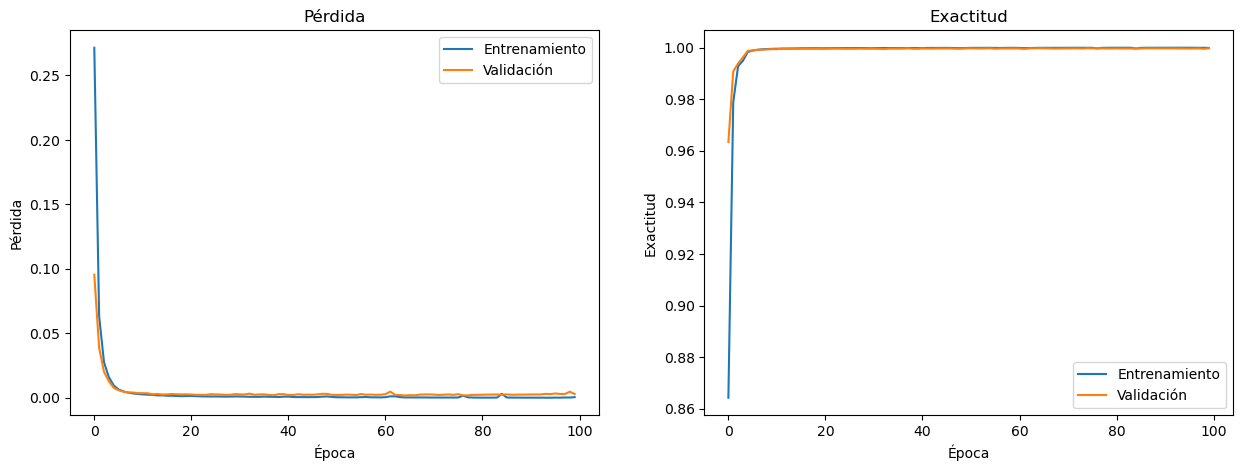

In [436]:
# Graficamos la pérdida  y la exactitud
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Porqué crees que se ha hecho un remuestreo solo a los datos de entrenamiento?
   - ¿Qué opinas de los resultados?, ¿nos podemos quedar con este modelo como aceptable?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
 La diferencia entre el submuestreo y el sobremuestreo radica en que en el primer caso se reduce la importancia de la clase mayoritaria eliminando datos, mientras que en el segundo caso se aumenta la importancia de la clase minoritaria replicando datos. En nuestro caso, parece más lógico replicar datos importantes que eliminar datos menos relevantes. El remuestreo se realizó solo en los datos de entrenamiento, ya que queremos entrenar el modelo con el mismo número de observaciones de cada clase, pero <b>queremos mantener los datos de prueba reales, ya que si este modelo estuviera en producción, también recibiría un ratio de aproximadamente 99.9% de transacciones no fraudulentas y un 0.1% de fraudulentas</b>.<br><br>
En cuanto a los resultados, se ha incrementado la exactitud general y se han reducido los falsos positivos de 1679 a 29. Nuestro objetivo de reducir los falsos negativos ha resultado en un leve incremento de 13 a 21. Por lo tanto, de las 98 transacciones fraudulentas, se han detectado correctamente 77 (aproximadamente el 80%). Sin embargo, creo que aún es posible mejorar el rendimiento del modelo en la detección de transacciones fraudulentas, aunque se trata de un modelo decente.
</div>

La exactitud sobre el conjunto de pruebas es: 0.9991222218320986


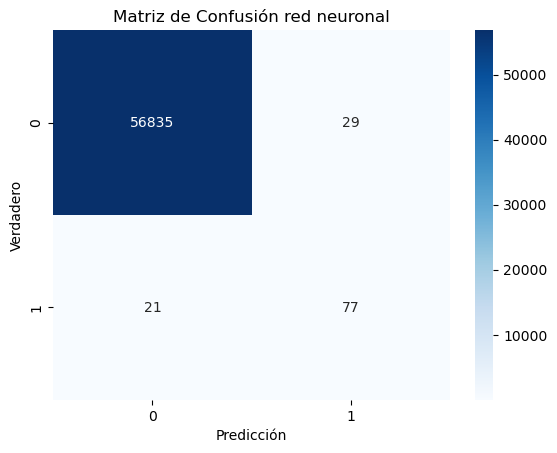

Recall: 0.7857142857142857


In [500]:
plot_predict_matrix_recall(model_mlp3, X_test, y_test)

## 2.5. Generación de datos sintéticos

SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo utilizada en el aprendizaje automático para abordar el problema de clases desequilibradas. SMOTE se utiliza para aumentar el número de muestras de la clase minoritaria al generar nuevas muestras sintéticas.

La técnica SMOTE funciona de la siguiente manera: Para cada muestra en la clase minoritaria, SMOTE selecciona k vecinos cercanos y crea nuevas muestras en el espacio entre la muestra y sus vecinos. Estas nuevas muestras sintéticas son agregadas al conjunto de datos para aumentar el número de muestras de la clase minoritaria.

La técnica SMOTE se utiliza en combinación con otras técnicas de preprocesamiento, como el submuestreo y la validación cruzada estratificada, para abordar el problema de clases desequilibradas en problemas de clasificación. Esta técnica puede mejorar la capacidad del modelo para aprender patrones de las clases minoritarias y puede aumentar el rendimiento en la clasificación de clases minoritarias.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Mediante la técnica SMOTE, aumenta el número de observaciones de la clase minoritaria de todo el conjunto de datos `X`. Puedes utilizar la función`SMOTE` de la librería `over_sampling` de la bibioteca `imblearn` .  Muestra las dimensiones de las nuevas matrices de entrenamiento y la frecuencia de cada clase. 
- Cread, entrenad, graficad las pérdidas y exactitud durante el entreno, validad y probad otro modelo `Sequential` con la misma configuración del apartado anterior.
</div>

In [440]:
from imblearn.over_sampling import SMOTE

# Creamos el objeto SMOTE
smote = SMOTE()

# Aplicamos la técnica SMOTE a X e y
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mostramos las nuevas dimensiones
print('Dimensiones de X_resampled:', X_resampled.shape)
print('Frecuencia de cada clase en y_resampled:', np.bincount(y_resampled))

Dimensiones de X_resampled: (568630, 29)
Frecuencia de cada clase en y_resampled: [284315 284315]


In [501]:
# Dividimos el dataset en entrenamiento y prueba, con una division estratificada
X_train, X_test, y_train_s, y_test_s = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=24, stratify=y_resampled)

# Codificamos las clases utilizando la función to_categorical
y_train = to_categorical(y_train_s)
y_test = to_categorical(y_test_s)
# Normalizamos sobre los descriptores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [460]:
# Creamos el modelo secuencial reducido
model_mlp4 = Sequential()
model_mlp4.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model_mlp4.add(Dense(20, activation='relu'))
model_mlp4.add(Dense(20, activation='relu'))
model_mlp4.add(Dense(20, activation='relu'))
model_mlp4.add(Dense(2, activation='sigmoid'))

# Compilacion del modelo
model_mlp4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model_mlp4.fit(X_train, y_train, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

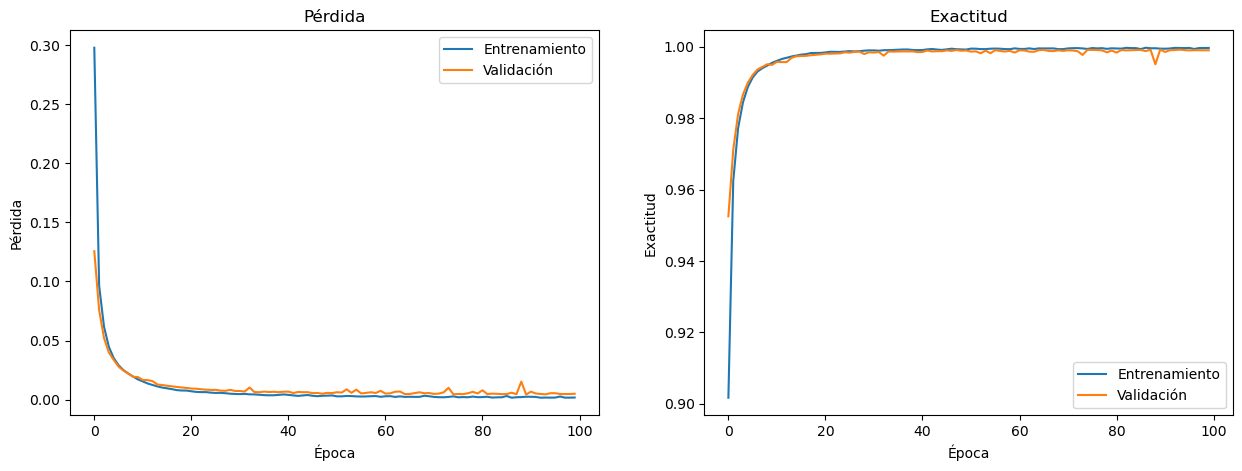

In [461]:
# Graficamos la pérdida  y la exactitud
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

   - ¿Porqué crees que en este caso si se puede hacer el remuestreo a todo el conjunto de datos?
   - ¿Qué opinas de los resultados?, ¿Este es mejor que el anterior modelo? ¿nos podemos quedar con este modelo como aceptable?
   - Enfocándonos en las variables descriptoras, ¿cómo crees que se puede mejorar la predicción?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong> <br><br>
Se puede realizar el remuestreo a todo el conjunto de datos, ya que SMOTE selecciona los k vecinos más cercanos de la clase minoritaria para crear nuevos datos entre la muestra y sus vecinos. Sin embargo, si se realiza SMOTE sobre el conjunto de entrenamiento, se obtendrían valores más dispersos de lo necesario, ya que parte de las observaciones de la clase minoritaria estarían en el conjunto de prueba y no encontraría los k vecinos más cercanos.<br><br>
En cuanto a los resultados, la exactitud global es de 99.8% debido a que <b>el nuevo modelo es más "estricto"</b> y predice como fraudulentas las transacciones mínimamente sospechosas. Además, se logró reducir el número de falsos negativos de 21 a 0, detectando correctamente todas transacciones fraudulentas (recall 100%). Este modelo ha logrado un rendimiento cercano a lo óptimo, se puede intentar mejorar el rendimiento del modelo a través de otras técnicas como fine-tuning de parámetros.<br><br>
En cuanto a las variables descriptoras, una posible mejora sería el <b>tratamiento de <i>outliers</i></b>. A menudo, los modelos de ML dan demasiada importancia a los outliers, tratando de clasificarlos correctamente a costa de clasificar incorrectamente otros datos. Por lo tanto, al descartar los outliers en la fase de entrenamiento, se podría lograr una mejora en el rendimiento del modelo.
</div>

La exactitud sobre el conjunto de pruebas es: 0.9982444436641972


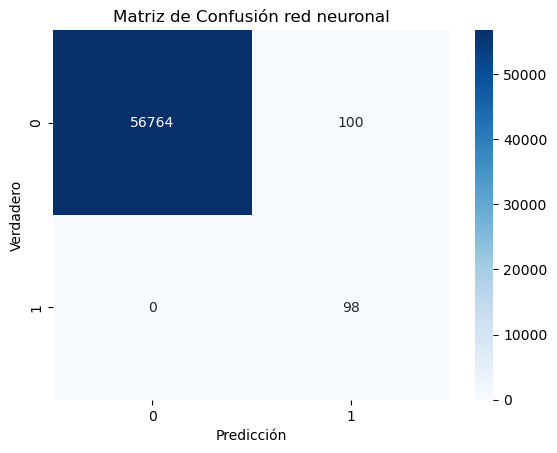

Recall: 1.0


In [502]:
# Dividimos el dataset en entrenamiento y prueba, con una division estratificada
X_train1, X_test1, y_train_s1, y_test_s1 = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X_test1 = scaler.transform(X_test1)
y_test1 = to_categorical(y_test_s1)

plot_predict_matrix_recall(model_mlp4, X_test1, y_test1)

## 2.6. Sintonizando los modelos (BONUS)

Los modelos anteriores se han configurado con hiperparámetros elegidos arbitrariamente y puede que no genere el modelo con el mejor rendimiento.  La búsqueda de hiperparámetros óptimos es importante porque permite encontrar la combinación de parámetros que maximiza el rendimiento del modelo en los datos de prueba o validación, lo que a su vez proporciona un modelo más generalizable y preciso para nuevos datos.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Mediante la función `GridSearchCV` de `sklearn.model_selection` y la función `KerasClassifier` de `keras.wrappers.scikit_learn`, encuentra los hiperparámetros óptimos para los modelos con los conjunto de datos: submuestreado, sobremuestreado y con generación sintética por medio de SMOTE. 
</div>

In [542]:
from keras.wrappers.scikit_learn import KerasClassifier

# Defino la función que crea el modelo Sequential
def create_model(neurons_layer):
    model = Sequential()
    model.add(Dense(neurons_layer, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(neurons_layer, activation='relu'))
    model.add(Dense(neurons_layer, activation='relu'))
    model.add(Dense(neurons_layer, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creo el clasificador de Keras
classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Hiperparámetros a buscar
params = {'neurons_layer': [16, 32, 64],
          'batch_size': [64, 128, 256, 512],
          'validation_split': [0.1, 0.2, 0.3]}

# Realizamos la búsqueda de hiperparámetros submuestreo
grid_downsampled = GridSearchCV(estimator=classifier, param_grid=params, cv=4)
grid_result_downsampled = grid_downsampled.fit(X_train_downsampled, y_train_downsampled)
print("Submuestreo: %f usando %s" % (grid_result_downsampled.best_score_, grid_result_downsampled.best_params_))

# Realizamos la búsqueda de hiperparámetros sobremuestreo
grid_upsampled = GridSearchCV(estimator=classifier, param_grid=params, cv=4)
grid_result_upsampled = grid_upsampled.fit(X_train_upsampled, y_train_upsampled)
print("Sobremuestreo: %f usando %s" % (grid_result_upsampled.best_score_, grid_result_upsampled.best_params_))

# Realizamos la búsqueda de hiperparámetros smote
grid_smote = GridSearchCV(estimator=classifier, param_grid=params, cv=4)
grid_result_smote = grid_smote.fit(X_train, y_train)
print("SMOTE: %f usando %s" % (grid_result_smote.best_score_, grid_result_smote.best_params_))

Submuestreo: 0.895939 usando {'neurons_layer': 64, 'batch_size': 512, 'validation_split': 0.1}
Sobremuestreo: 0.998967 usando {'neurons_layer': 64, 'batch_size': 512, 'validation_split': 0.1}
SMOTE: 0.997252 usando {'neurons_layer': 64, 'batch_size': 512, 'validation_split': 0.1}


<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

He seleccionado los parámetros batch_size y validation_split para determinar cómo se entrena el modelo, y el parámetro neurons_layer para determinar la cantidad de neuronas de cada capa. Aunque se podría haber buscado los parámetros óptimos para cada capa de forma individual, esto habría aumentado significativamente el tiempo de entrenamiento.<br><br>
En cuanto a los resultados, podemos utilizar la variable best_estimator_ de cada tipo de remuestreo para evaluar el recall y la exactitud. En general, se observa que utilizar <b>una mayor cantidad de neuronas por capa, un mayor batch_size y un menor validation_split han proporcionado mejores resultados</b>. No he incluido el parámetro epochs para reducir el tiempo de entrenamiento, y porque, en general, un mayor número de epochs suele mejorar el rendimiento. <br><br>
A continuación, se muestran las matrices de confusión utilizando el best_estimator_ de los conjuntos de datos submuestreado, sobremuestreado y con SMOTE.Se puede observar que al utilizar <b>SMOTE con una sola época de entrenamiento y los parámetros adecuados, logra una sensibilidad (recall) del 100%</b>. Es importante tener en cuenta que estos modelos pueden proporcionar peores resultados que los anteriores, ya que solo se han entrenado con una epoch (el parámetro por defecto) y solo se utilizan como referencia para determinar qué tipo de remuestreo y parámetros son más adecuados. 

La exactitud sobre el conjunto de pruebas con submuestreo es: 0.9990344440153085
Recall submuestreo: 0.5204081632653061
La exactitud sobre el conjunto de pruebas con sobremuestreo es: 0.9987886661282961
Recall sobremuestreo: 0.3163265306122449
La exactitud sobre el conjunto de pruebas con smote es: 0.9912397738843439
Recall smote: 1.0


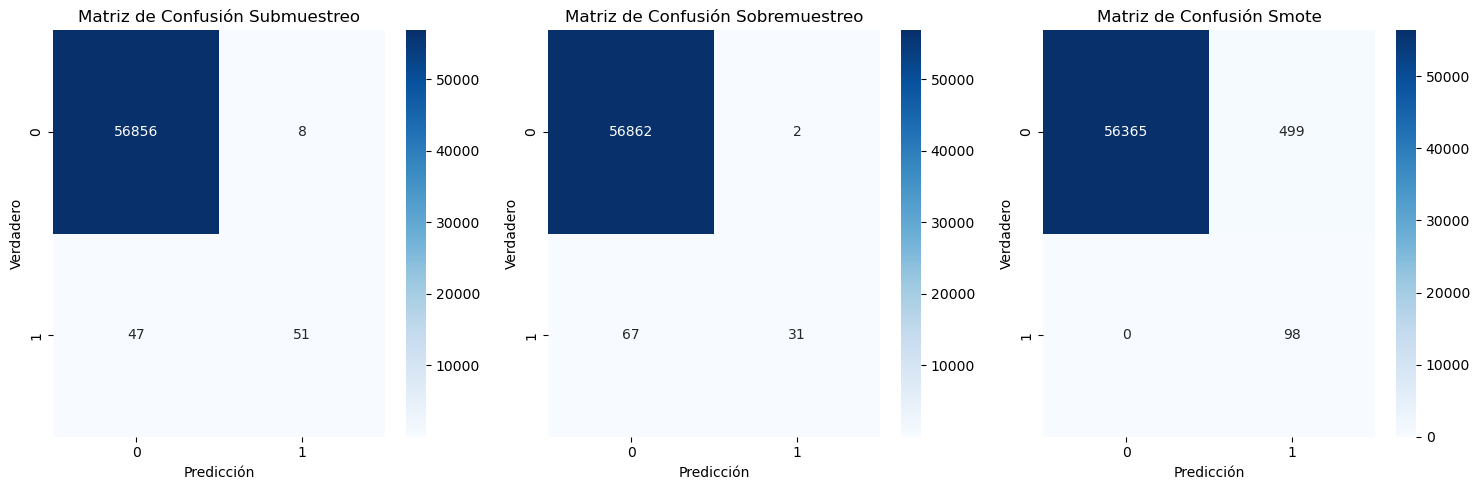

In [544]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
# Predecimos X_test
y_pred1 = grid_result_downsampled.best_estimator_.predict(X_test1, verbose=0)

# Calculamos la exactitud
accuracy = accuracy_score(np.argmax(y_test1, axis=1), np.round(y_pred1))

# Creamos la matriz de confusión, convertimos one-hot encoder a una clase
y_test_classes = np.argmax(y_test1, axis=1)
y_pred_classes = y_pred1
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(f"La exactitud sobre el conjunto de pruebas con submuestreo es: {accuracy}")
# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Submuestreo')
print(f"Recall submuestreo: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])}")

plt.subplot(1,3,2)
# Predecimos X_test
y_pred1 = grid_result_upsampled.best_estimator_.predict(X_test1, verbose=0)

# Calculamos la exactitud
accuracy = accuracy_score(np.argmax(y_test1, axis=1), np.round(y_pred1))

# Creamos la matriz de confusión, convertimos one-hot encoder a una clase
y_test_classes = np.argmax(y_test1, axis=1)
y_pred_classes = y_pred1
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(f"La exactitud sobre el conjunto de pruebas con sobremuestreo es: {accuracy}")
# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Sobremuestreo')
print(f"Recall sobremuestreo: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])}")


plt.subplot(1,3,3)
# Predecimos X_test
y_pred1 = grid_result_smote.best_estimator_.predict(X_test1, verbose=0)

# Calculamos la exactitud
accuracy = accuracy_score(np.argmax(y_test1, axis=1), np.round(y_pred1))

# Creamos la matriz de confusión, convertimos one-hot encoder a una clase
y_test_classes = np.argmax(y_test1, axis=1)
y_pred_classes = y_pred1
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(f"La exactitud sobre el conjunto de pruebas con smote es: {accuracy}")
# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión Smote')
print(f"Recall smote: {conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])}")
plt.tight_layout()
plt.show()